<a href="https://colab.research.google.com/github/Dantakara/ML-classification-algorithms-for-SECOM/blob/main/Final__Main_File___SECOM_DATSET_Classifiers_Development___UFS___10November2020_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries to be use**

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import pandas as pd
from tensorflow import keras
import numpy as np # linear algebra
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, cross_val_predict
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report
from keras.utils import to_categorical

# %tensorflow_version 1.x

# **Getting the data**

In [32]:
!rm -rf sample_data/
#!rm -rf uci-secom.csv


In [8]:
from google.colab import files
files.upload()

Saving uci-secom_v2.csv to uci-secom_v2.csv


{'uci-secom_v2.csv': b'Time,0,1,2,3,4,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,43,44,45,46,47,48,50,51,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,70,71,72,73,75,76,77,78,79,80,81,82,83,84,86,87,88,89,90,91,92,93,94,95,96,98,99,100,101,102,103,104,105,106,107,108,112,113,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,142,143,144,145,146,147,148,150,151,152,153,154,155,156,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,180,181,182,183,184,185,187,188,195,196,197,198,199,200,201,202,203,204,205,207,208,210,211,212,213,214,215,216,217,218,219,221,222,223,224,225,227,228,238,239,247,248,249,250,251,252,253,254,255,267,268,269,270,271,272,273,274,275,277,278,279,280,281,282,283,285,286,287,288,289,290,291,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,316,317,318,319,320,321,323,324,331,332,333,334,335,336,337,338,

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# change the permission
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d paresh2047/uci-semcom

In [ ]:
# unzipping my data folder from my google drive
from zipfile import ZipFile
file_name = '/content/drive/My Drive/secom.zip'
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")


In [33]:
Data = pd.read_csv('/content/uci-secom_v2.csv')

# displaying the dataset 
Data.head()


Time        0        1  ...     588       589  Pass/Fail
0  19/07/2008 11:55  3030.93  2564.00  ...     NaN       NaN         -1
1  19/07/2008 12:32  3095.78  2465.14  ...  0.0060  208.2045         -1
2  19/07/2008 13:17  2932.61  2559.94  ...  0.0148   82.8602          1
3  19/07/2008 14:43  2988.72  2479.90  ...  0.0044   73.8432         -1
4  19/07/2008 15:22  3032.24  2502.87  ...  0.0044   73.8432         -1

[5 rows x 451 columns]

In [34]:
#checking for any missing datapoints

Data.isnull().any().any()

True

In [35]:
#reclassifying the classes with 0 and 1, pass and fail class respectively

Data = Data.drop(['Time'], axis=1)
Data.loc[(Data['Pass/Fail'] == -1),'Pass/Fail'] = 0
Data.head()

0        1          2          3  ...     587     588       589  Pass/Fail
0  3030.93  2564.00  2187.7333  1411.1265  ...     NaN     NaN       NaN          0
1  3095.78  2465.14  2230.4222  1463.6606  ...  0.0201  0.0060  208.2045          0
2  2932.61  2559.94  2186.4111  1698.0172  ...  0.0484  0.0148   82.8602          1
3  2988.72  2479.90  2199.0333   909.7926  ...  0.0149  0.0044   73.8432          0
4  3032.24  2502.87  2233.3667  1326.5200  ...  0.0149  0.0044   73.8432          0

[5 rows x 450 columns]

In [36]:
#Dropping the output column

features = Data.drop(['Pass/Fail'],axis=1)
features_labels = Data['Pass/Fail']

In [37]:
features.shape

(1567, 449)

# **Data Exploration and Visualisation**

0    1463
1     104
Name: Pass/Fail, dtype: int64


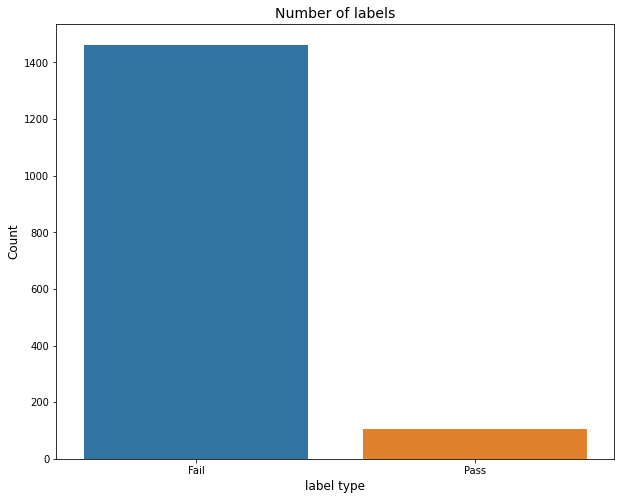

In [38]:
# Get the counts for each class

alabel_count = Data['Pass/Fail'].value_counts()
print(alabel_count)

# Plot the results 
plt.figure(figsize=(10,8))
sns.barplot(x=alabel_count.index, y= alabel_count.values)
plt.title('Number of labels', fontsize=14)
plt.xlabel('label type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(alabel_count.index)), ['Fail', 'Pass'])
plt.show()

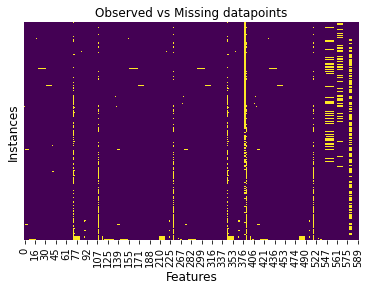

In [39]:
# Missing datapoints vs Observed 

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(Data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

plt.title('Observed vs Missing datapoints', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Instances', fontsize=12)
#plt.xticks(range(len(alabel_count.index)), ['Features'])
plt.show()


# **Preprocessing the Data**

In [40]:
# finding missing and categorical values


col_missing_values = [col for col in features.columns
                     if features[col].isnull().any() and features[col].dtype]

# col wit numerical values which is null in this project
col_numerical_values = [col for col in features.columns if features[col].dtype in ['int64', 'float64']]

# col with categorical values
col_categorical_values = [col for col in features.columns 
                         if features[col].dtype == 'object']

#missing values cout per col
missing_val_count_by_column = (features.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])
print(col_categorical_values)
print(col_numerical_values)
  



0       6
1       7
2      14
3      14
4      14
       ..
585     1
586     1
587     1
588     1
589     1
Length: 399, dtype: int64
[]
['0', '1', '2', '3', '4', '6', '7', '8', '9', '10', '11', '12', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '43', '44', '45', '46', '47', '48', '50', '51', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '70', '71', '72', '73', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '112', '113', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '142', '143', '144', '145', '146', '147', '148', '150', '151', '

**Imputation** 

Mean

In [ ]:
# Missing datapoints mean imputation 

#from sklearn.impute import SimpleImputer

# Fill in the lines below: imputation
imputer = SimpleImputer(strategy='mean') # Your code here
imputed_features = pd.DataFrame(imputer.fit_transform(features))

# Fill in the lines below: imputation removed column names; put them back
imputed_features.columns = features.columns

features = imputed_features

**KNN**

In [41]:
#Data imputation using KNN

from sklearn.impute import KNNImputer 

imputer = KNNImputer()
imputed_features = pd.DataFrame(imputer.fit_transform(features))

# Fill in the lines below: imputation removed column names; put them back
imputed_features.columns = features.columns

features = imputed_features

In [18]:
features.head()

0        1          2          3  ...      586      587      588       589
0  3030.93  2564.00  2187.7333  1411.1265  ...  0.01942  0.01266  0.00438   65.5742
1  3095.78  2465.14  2230.4222  1463.6606  ...  0.00960  0.02010  0.00600  208.2045
2  2932.61  2559.94  2186.4111  1698.0172  ...  0.05840  0.04840  0.01480   82.8602
3  2988.72  2479.90  2199.0333   909.7926  ...  0.02020  0.01490  0.00440   73.8432
4  3032.24  2502.87  2233.3667  1326.5200  ...  0.02020  0.01490  0.00440   73.8432

[5 rows x 449 columns]

In [42]:
#Checking for any missing cell value

features.isnull().any().any()

False

In [43]:
#Importing features to csv file 

features.to_csv('features.csv')
features_labels.to_csv('features_labels.csv')

**Feature Scaling and Selection**

Scaling and UFS

In [55]:
# Feature selection using UFS
from sklearn.feature_selection import SelectFdr
from sklearn.feature_selection import f_classif , chi2
# Create a UFS 
UFS = SelectFdr(score_func=f_classif)

features = UFS.fit_transform(features, features_labels)

#features = ft.fit_transform(features)

# Show results
print("Original number of features:", Data.shape[1])
print("Reduced number of features:", features.shape[1])

Original number of features: 450
Reduced number of features: 38


SCALING

In [56]:
Scaler = StandardScaler()
features = Scaler.fit_transform(features)

In [57]:
# Dataset dimensin visualization

features.shape

(1567, 38)

In [58]:
features

array([[ 0.31892533,  0.73507503, -0.87417873, ..., -0.12719353,
         0.64536095,  0.23611456],
       [ 0.28300194, -0.32255811,  0.40041413, ..., -0.16884146,
        -0.26078888,  2.27458394],
       [ 0.27302322,  0.00768763,  0.48070345, ..., -0.19145397,
        -0.50866288,  4.91250286],
       ...,
       [ 0.74322041,  0.02547009,  0.02643496, ..., -0.1080944 ,
         0.41621085, -0.02511962],
       [ 0.55402392, -0.07783755,  0.26149249, ..., -0.118594  ,
         2.00208191,  0.60332467],
       [ 0.47778652, -0.1066282 ,  0.36977742, ..., -0.0958917 ,
         1.18563264,  0.53329541]])

# **Model Evaluation**

In [59]:
def get_Evaluation_matrics(preds, orig_test_labels):

  # Get the confusion matrix
  cm  = confusion_matrix(orig_test_labels, preds)
  plt.figure()
  plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
  plt.xticks(range(2), ['Fail', 'Pass'], fontsize=16)
  plt.yticks(range(2), ['Fail', 'Pass'], fontsize=16)
  plt.show()

  # Calculate Precision and Recall
  tn, fp, fn, tp = cm.ravel()
  Accuracy = (tp+tn)/(tp+tn+fp+fn)
  precision = tp/(tp+fp)
  recall = tp/(tp+fn)
  specificity = tn/(tn+fp)
  F1_score = 2*tp/(2*tp+fp+fn)

  print("Accuracy of the model is {:.4f}".format(Accuracy))
  print("Recall of the model is {:.4f}".format(recall))
  print("Precision of the model is {:.4f}".format(precision))
  print("specificity of the model is {:.4f}".format(specificity))
  print("F1_score of the model is {:.4f}".format(F1_score))



# **Model Prediction**

In [60]:
def get_Model_prediction(model, test_data, test_labels):
  import numpy as np

  # # Evaluation on test dataset
  # test_loss, test_score = model.evaluate(test_data, test_labels, batch_size=32)
  # print("Loss on test set: ", test_loss)
  # print("Accuracy on test set: ", test_score)
  
  preds = model.predict(test_data, batch_size=16)
  preds = np.argmax(preds, axis=-1)

  # orig_test_labels = np.argmax(test_labels, axis=-1)

  print(test_labels)
  print(preds)

  return preds, test_labels

# **Model ROC and AUC value**

In [61]:
def get_model_ROC_AUC_curve(model_pred, test_labels, label=None):
    import numpy as np

    from sklearn.metrics import roc_curve, auc
    fpr, tpr, thresholds = roc_curve(test_labels, model_pred)
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title( 'ROC curve')

    auc_score = auc(fpr, tpr)
    print('AUC Score : ', auc_score)

# **Plotting Model Loss**

In [62]:
def plot_Model_loss(History, epoch):
  history_dict2 = History.history
  loss_values2 = history_dict2['loss']
  val_loss_values2 = history_dict2['val_loss']

  epochs = range(1, epoch + 1)
  plt.plot(epochs, loss_values2, 'b-', label='training loos')
  plt.plot(epochs, val_loss_values2, 'r-', label='validation loss')
  plt.title('trainin/validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.rcParams['axes.facecolor'] = 'white'
  plt.rcParams['axes.edgecolor'] = 'white'
  plt.rcParams['axes.grid'] = True
  plt.rcParams['grid.alpha'] = 1
  plt.rcParams['grid.color'] = "#cccccc"
  plt.show()

# **Plotting Model Accuracy**

In [63]:
def plot_Model_Accuracy(History, epoch):
  history_dict2 = History.history
  acc_values2 = history_dict2['accuracy']
  val_acc_values2 = history_dict2['val_accuracy']

  epochs = range(1, epoch + 1)
  plt.plot(epochs, acc_values2, 'b-', label='training Accuracy')
  plt.plot(epochs, val_acc_values2, 'r-', label='validation Accuracy')
  plt.title('trainin/validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.rcParams['axes.facecolor'] = 'white'
  plt.rcParams['axes.edgecolor'] = 'white'
  plt.rcParams['axes.grid'] = True
  plt.rcParams['grid.alpha'] = 1
  plt.rcParams['grid.color'] = "#cccccc"
  plt.show()

# **Model Building Using SMOTE Data Balancing**

#Data training and testing split 80|20

**MLP**

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


<Figure size 432x288 with 0 Axes>

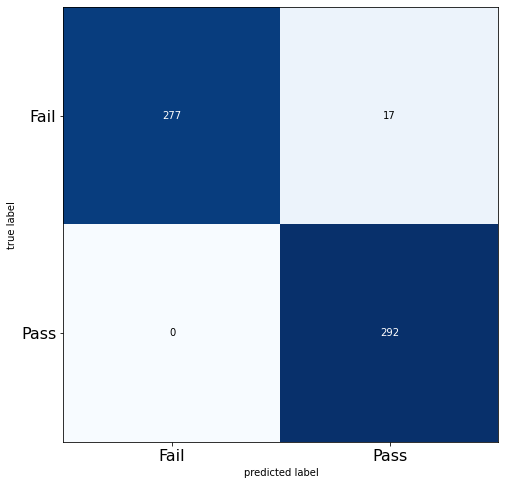

Accuracy of the model is 0.9710
Recall of the model is 1.0000
Precision of the model is 0.9450
specificity of the model is 0.9422
F1_score of the model is 0.9717
AUC Score :  0.9710884353741497


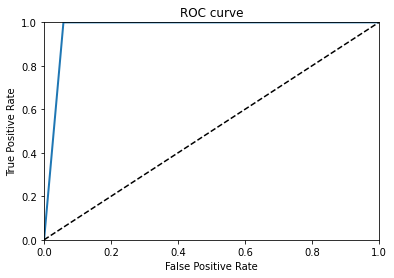

In [86]:
from sklearn.neural_network import MLPClassifier as MLP

from imblearn.over_sampling import SMOTE
oversample = SMOTE()

X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = MLP()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)

# plotting the AUC for all my classes

get_model_ROC_AUC_curve(preds, test_labels)

**XGBoost**

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 432x288 with 0 Axes>

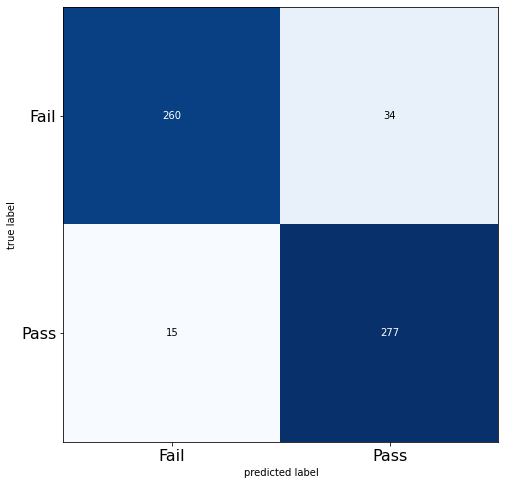

Accuracy of the model is 0.9164
Recall of the model is 0.9486
Precision of the model is 0.8907
specificity of the model is 0.8844
F1_score of the model is 0.9187
AUC Score :  0.9164919392414501


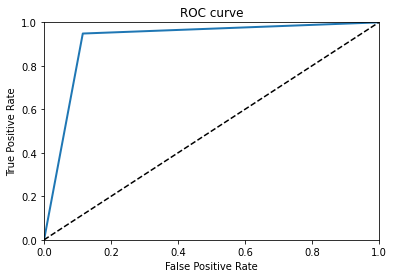

In [98]:
from xgboost.sklearn import XGBClassifier
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = XGBClassifier()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)

# plotting the AUC for all my classes

get_model_ROC_AUC_curve(preds, test_labels)

**LR**

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning

<Figure size 432x288 with 0 Axes>

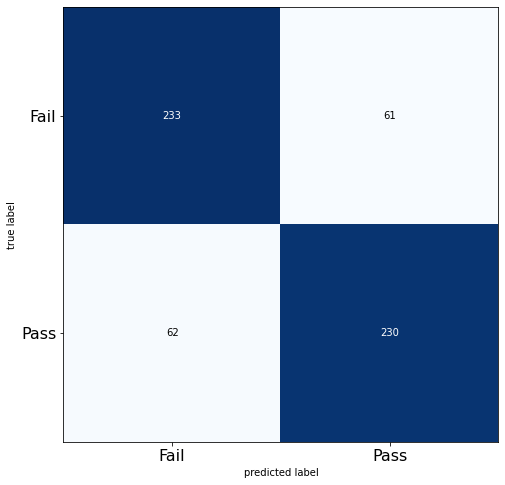

Accuracy of the model is 0.7901
Recall of the model is 0.7877
Precision of the model is 0.7904
specificity of the model is 0.7925
F1_score of the model is 0.7890
AUC Score :  0.7900941198397168


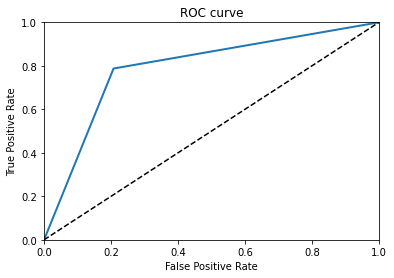

In [110]:
from sklearn.linear_model import LogisticRegression as LR
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = LR(max_iter=100)

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)

# plotting the AUC for all my classes

get_model_ROC_AUC_curve(preds, test_labels)

**DT**

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x288 with 0 Axes>

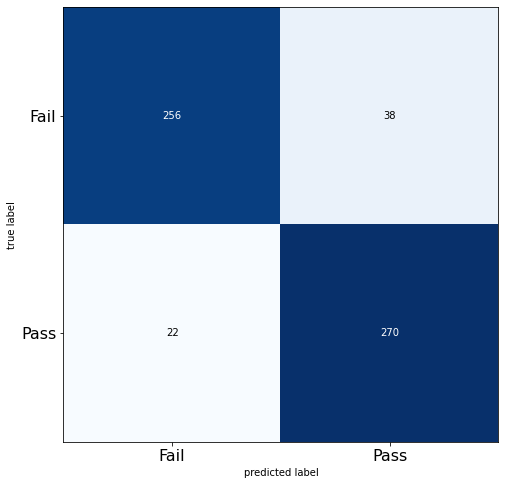

Accuracy of the model is 0.8976
Recall of the model is 0.9247
Precision of the model is 0.8766
specificity of the model is 0.8707
F1_score of the model is 0.9000
AUC Score :  0.8977029167831515


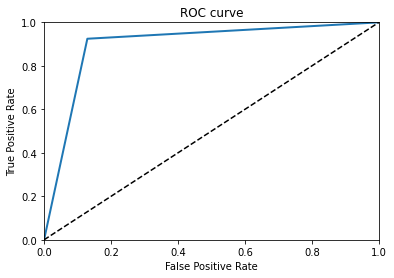

In [125]:
from sklearn.tree import DecisionTreeClassifier as DT
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = DT()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)

# plotting the AUC for all my classes

get_model_ROC_AUC_curve(preds, test_labels)

**NB**

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 432x288 with 0 Axes>

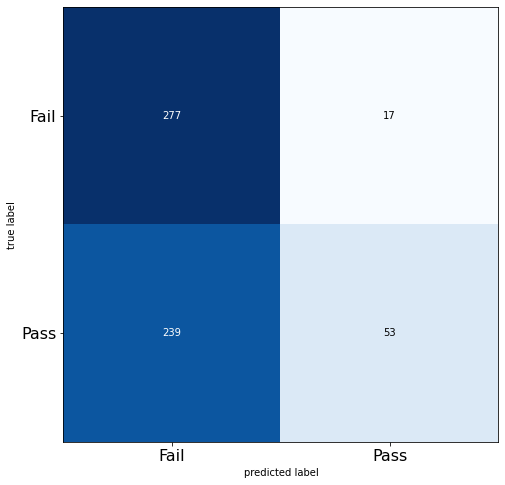

Accuracy of the model is 0.5631
Recall of the model is 0.1815
Precision of the model is 0.7571
specificity of the model is 0.9422
F1_score of the model is 0.2928
AUC Score :  0.5618418600316839


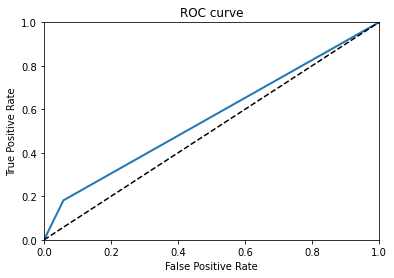

In [152]:
from sklearn.naive_bayes import GaussianNB as NB
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = NB()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)

# plotting the AUC for all my classes

get_model_ROC_AUC_curve(preds, test_labels)

**LDA**

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 432x288 with 0 Axes>

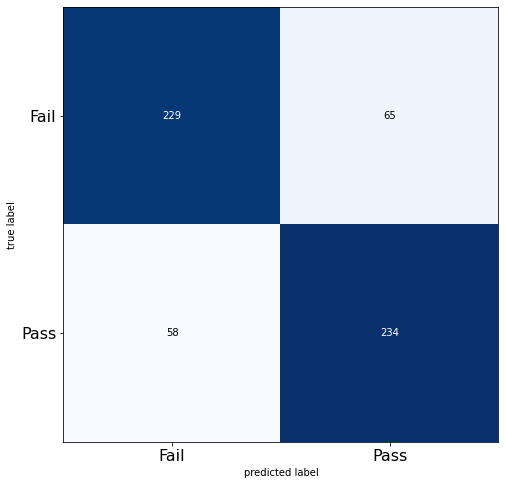

Accuracy of the model is 0.7901
Recall of the model is 0.8014
Precision of the model is 0.7826
specificity of the model is 0.7789
F1_score of the model is 0.7919
AUC Score :  0.7901407138197745


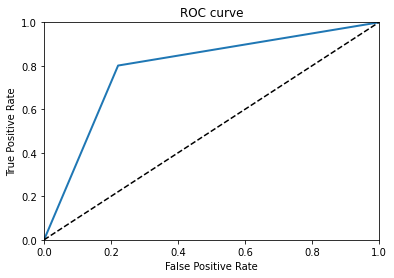

In [170]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = LDA()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)

# plotting the AUC for all my classes

get_model_ROC_AUC_curve(preds, test_labels)

**RF**

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


<Figure size 432x288 with 0 Axes>

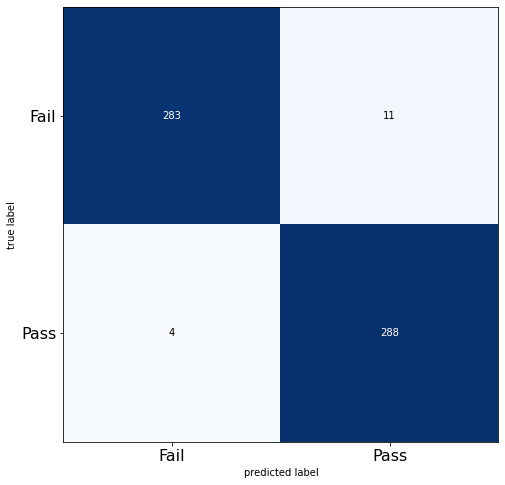

Accuracy of the model is 0.9744
Recall of the model is 0.9863
Precision of the model is 0.9632
specificity of the model is 0.9626
F1_score of the model is 0.9746
AUC Score :  0.9744432019383095


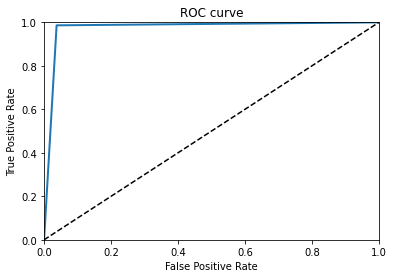

In [215]:
from sklearn.ensemble import RandomForestClassifier as RF
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = RF()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)

# plotting the AUC for all my classes

get_model_ROC_AUC_curve(preds, test_labels)

**SVC**

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 432x288 with 0 Axes>

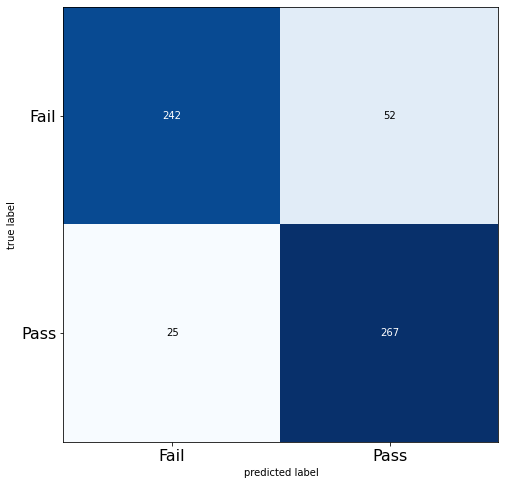

Accuracy of the model is 0.8686
Recall of the model is 0.9144
Precision of the model is 0.8370
specificity of the model is 0.8231
F1_score of the model is 0.8740
AUC Score :  0.868756406672258


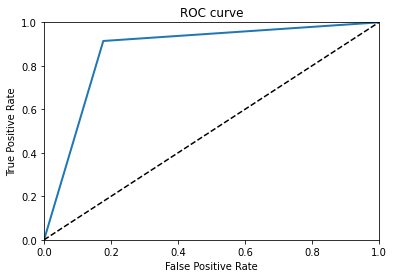

In [232]:
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = SVC()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)

# plotting the AUC for all my classes

get_model_ROC_AUC_curve(preds, test_labels)

**AdaBoost**

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 432x288 with 0 Axes>

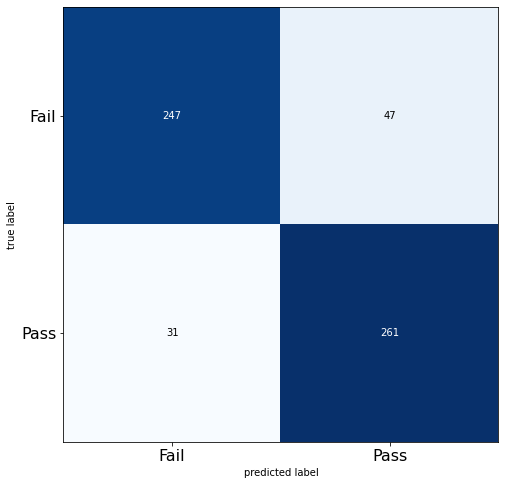

Accuracy of the model is 0.8669
Recall of the model is 0.8938
Precision of the model is 0.8474
specificity of the model is 0.8401
F1_score of the model is 0.8700
AUC Score :  0.8669858354300624


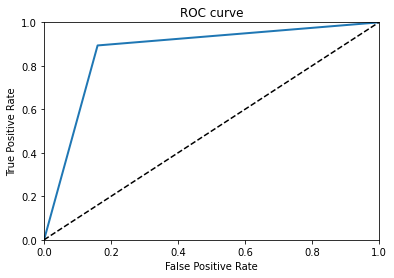

In [253]:
from sklearn.ensemble import AdaBoostClassifier as ADB
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = ADB()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)

# plotting the AUC for all my classes

get_model_ROC_AUC_curve(preds, test_labels)

**GBT**

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 432x288 with 0 Axes>

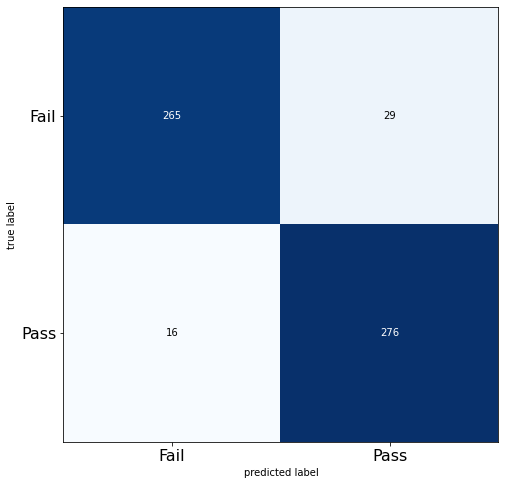

Accuracy of the model is 0.9232
Recall of the model is 0.9452
Precision of the model is 0.9049
specificity of the model is 0.9014
F1_score of the model is 0.9246
AUC Score :  0.9232830118348709


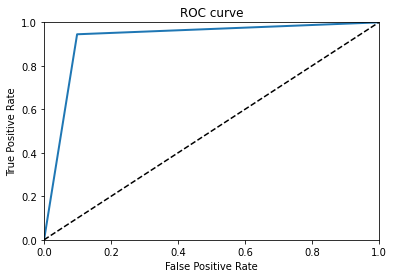

In [257]:
from sklearn.ensemble import GradientBoostingClassifier as GBT
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = GBT()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)

# plotting the AUC for all my classes

get_model_ROC_AUC_curve(preds, test_labels)

# K-Fold CV

In [261]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, cross_validate
from sklearn.pipeline import make_pipeline

features, features_labels = oversample.fit_resample(features, features_labels)

# Create standardizer
standardizer = StandardScaler()

# Create logistic regression object
logit = SVC()
# Create a pipeline that standardizes, then runs logistic regression
pipeline = make_pipeline(standardizer, logit)
# Create k-Fold cross-validation
kf = KFold(n_splits=7, shuffle=True, random_state=1)
# Conduct k-fold cross-validation
cv_results = cross_val_score(logit, # Pipeline
                              features, # Feature matrix
                              features_labels, # Target vector
                              cv=kf, # Cross-validation technique
                              scoring="precision", # Loss function
                              n_jobs=-1) # Use all CPU scores
# Calculate mean
cv_results.mean()

0.8235264678919744

In [260]:
!pip install museotoolbox

     |████████████████████████████████| 1.8MB 4.8MB/s 
  Created wheel for museotoolbox: filename=museotoolbox-0.13.6-cp36-none-any.whl size=1812020 sha256=5e27a7325181ee780f1e66696a1958e1a6c8eadca85d319194a03987ed8aa1f0
  Stored in directory: /root/.cache/pip/wheels/f0/56/fb/a5ecb3494188343c3e4f025e03dc5afdb0befa767f7f9db4b8
Successfully built museotoolbox


**MLP**

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array([[193,   0],
       [ 15, 208]], dtype=int16)

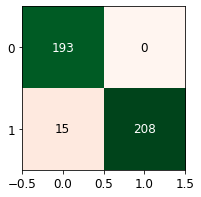

In [263]:
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.model_selection import KFold
from museotoolbox.charts import PlotConfusionMatrix

from imblearn.over_sampling import SMOTE
oversample = SMOTE()

train_data, train_labels = oversample.fit_resample(features, features_labels)

#Create algorithm object
model = MLP()

conf_matrix_list_of_arrays = []
kf = KFold(7, shuffle=True, random_state=123)

for train_index, test_index  in kf.split(train_data):

   train_data1, test_data1 = train_data[train_index], train_data[test_index]
   train_labels1, test_labels1 = train_labels[train_index], train_labels[test_index]

   model.fit(train_data1, train_labels1)
   conf_matrix = confusion_matrix(test_labels1, model.predict(test_data1))
   conf_matrix_list_of_arrays .append(conf_matrix)


mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0).astype(np.int16)


pltCM = PlotConfusionMatrix(mean_of_conf_matrix_arrays.T) # Translate for Y = prediction and X = truth
pltCM.add_text()
# pltCM.add_f1()
pltCM.color_diagonal()
   

mean_of_conf_matrix_arrays.T

In [264]:
tp = 193
tn = 208
fp = 0
fn = 15

Accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)
F1_score = 2*tp/(2*tp+fp+fn)

print("Accuracy of the model is {:.4f}".format(Accuracy))
print("Recall of the model is {:.4f}".format(recall))
print("Precision of the model is {:.4f}".format(precision))
print("specificity of the model is {:.4f}".format(specificity))
print("F1_score of the model is {:.4f}".format(F1_score))
print("")

Accuracy of the model is 0.9639
Recall of the model is 0.9279
Precision of the model is 1.0000
specificity of the model is 1.0000
F1_score of the model is 0.9626



**XGBooST**

array([[ 97,   4],
       [ 15, 107]], dtype=int16)

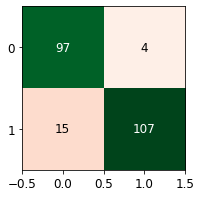

In [267]:
from xgboost.sklearn import XGBClassifier

from sklearn.model_selection import KFold
from museotoolbox.charts import PlotConfusionMatrix

from imblearn.over_sampling import SMOTE
oversample = SMOTE()

train_data, train_labels = oversample.fit_resample(features, features_labels)

#Create algorithm object
model = XGBClassifier()

conf_matrix_list_of_arrays = []
kf = KFold(13, shuffle=True, random_state=123)

for train_index, test_index  in kf.split(train_data):

   train_data1, test_data1 = train_data[train_index], train_data[test_index]
   train_labels1, test_labels1 = train_labels[train_index], train_labels[test_index]

   model.fit(train_data1, train_labels1)
   conf_matrix = confusion_matrix(test_labels1, model.predict(test_data1))
   conf_matrix_list_of_arrays .append(conf_matrix)


mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0).astype(np.int16)


pltCM = PlotConfusionMatrix(mean_of_conf_matrix_arrays.T) # Translate for Y = prediction and X = truth
pltCM.add_text()
# pltCM.add_f1()
pltCM.color_diagonal()
   

mean_of_conf_matrix_arrays.T

In [266]:
tp = 97
tn = 107
fp = 4
fn = 15

Accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)
F1_score = 2*tp/(2*tp+fp+fn)

print("Accuracy of the model is {:.4f}".format(Accuracy))
print("Recall of the model is {:.4f}".format(recall))
print("Precision of the model is {:.4f}".format(precision))
print("specificity of the model is {:.4f}".format(specificity))
print("F1_score of the model is {:.4f}".format(F1_score))
print("")

Accuracy of the model is 0.9148
Recall of the model is 0.8661
Precision of the model is 0.9604
specificity of the model is 0.9640
F1_score of the model is 0.9108



**LR**

array([[372, 112],
       [115, 375]], dtype=int16)

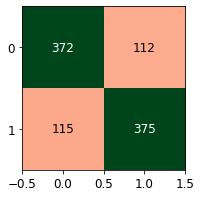

In [271]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import KFold
from museotoolbox.charts import PlotConfusionMatrix

from imblearn.over_sampling import SMOTE
oversample = SMOTE()

train_data, train_labels = oversample.fit_resample(features, features_labels)

#Create algorithm object
model = LR(max_iter=200)

conf_matrix_list_of_arrays = []
kf = KFold(3, shuffle=True, random_state=123)

for train_index, test_index  in kf.split(train_data):

   train_data1, test_data1 = train_data[train_index], train_data[test_index]
   train_labels1, test_labels1 = train_labels[train_index], train_labels[test_index]

   model.fit(train_data1, train_labels1)
   conf_matrix = confusion_matrix(test_labels1, model.predict(test_data1))
   conf_matrix_list_of_arrays .append(conf_matrix)


mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0).astype(np.int16)


pltCM = PlotConfusionMatrix(mean_of_conf_matrix_arrays.T) # Translate for Y = prediction and X = truth
pltCM.add_text()
# pltCM.add_f1()
pltCM.color_diagonal()
   

mean_of_conf_matrix_arrays.T

In [272]:
tp = 372
tn = 375
fp = 112
fn = 115

Accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)
F1_score = 2*tp/(2*tp+fp+fn)

print("Accuracy of the model is {:.4f}".format(Accuracy))
print("Recall of the model is {:.4f}".format(recall))
print("Precision of the model is {:.4f}".format(precision))
print("specificity of the model is {:.4f}".format(specificity))
print("F1_score of the model is {:.4f}".format(F1_score))
print("")

Accuracy of the model is 0.7669
Recall of the model is 0.7639
Precision of the model is 0.7686
specificity of the model is 0.7700
F1_score of the model is 0.7662



**DT**

array([[123,  12],
       [ 23, 134]], dtype=int16)

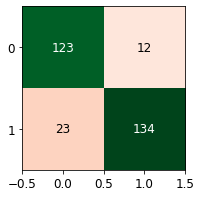

In [279]:
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.model_selection import KFold
from museotoolbox.charts import PlotConfusionMatrix

from imblearn.over_sampling import SMOTE
oversample = SMOTE()

train_data, train_labels = oversample.fit_resample(features, features_labels)

#Create algorithm object
model = DT()

conf_matrix_list_of_arrays = []
kf = KFold(10, shuffle=True, random_state=123)

for train_index, test_index  in kf.split(train_data):

   train_data1, test_data1 = train_data[train_index], train_data[test_index]
   train_labels1, test_labels1 = train_labels[train_index], train_labels[test_index]

   model.fit(train_data1, train_labels1)
   conf_matrix = confusion_matrix(test_labels1, model.predict(test_data1))
   conf_matrix_list_of_arrays .append(conf_matrix)


mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0).astype(np.int16)


pltCM = PlotConfusionMatrix(mean_of_conf_matrix_arrays.T) # Translate for Y = prediction and X = truth
pltCM.add_text()
# pltCM.add_f1()
pltCM.color_diagonal()
   

mean_of_conf_matrix_arrays.T

In [280]:
tp = 123
tn = 134
fp = 12
fn = 23

Accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)
F1_score = 2*tp/(2*tp+fp+fn)

print("Accuracy of the model is {:.4f}".format(Accuracy))
print("Recall of the model is {:.4f}".format(recall))
print("Precision of the model is {:.4f}".format(precision))
print("specificity of the model is {:.4f}".format(specificity))
print("F1_score of the model is {:.4f}".format(F1_score))
print("")

Accuracy of the model is 0.8801
Recall of the model is 0.8425
Precision of the model is 0.9111
specificity of the model is 0.9178
F1_score of the model is 0.8754



**NB**

array([[197, 178],
       [ 12,  30]], dtype=int16)

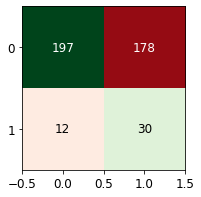

In [286]:
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.model_selection import KFold
from museotoolbox.charts import PlotConfusionMatrix

from imblearn.over_sampling import SMOTE
oversample = SMOTE()

train_data, train_labels = oversample.fit_resample(features, features_labels)

#Create algorithm object
model = NB()

conf_matrix_list_of_arrays = []
kf = KFold(7, shuffle=True, random_state=123)

for train_index, test_index  in kf.split(train_data):

   train_data1, test_data1 = train_data[train_index], train_data[test_index]
   train_labels1, test_labels1 = train_labels[train_index], train_labels[test_index]

   model.fit(train_data1, train_labels1)
   conf_matrix = confusion_matrix(test_labels1, model.predict(test_data1))
   conf_matrix_list_of_arrays .append(conf_matrix)


mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0).astype(np.int16)


pltCM = PlotConfusionMatrix(mean_of_conf_matrix_arrays.T) # Translate for Y = prediction and X = truth
pltCM.add_text()
# pltCM.add_f1()
pltCM.color_diagonal()
   

mean_of_conf_matrix_arrays.T

In [287]:
tp = 197
tn = 30
fp = 178
fn = 12

Accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)
F1_score = 2*tp/(2*tp+fp+fn)

print("Accuracy of the model is {:.4f}".format(Accuracy))
print("Recall of the model is {:.4f}".format(recall))
print("Precision of the model is {:.4f}".format(precision))
print("specificity of the model is {:.4f}".format(specificity))
print("F1_score of the model is {:.4f}".format(F1_score))
print("")

Accuracy of the model is 0.5444
Recall of the model is 0.9426
Precision of the model is 0.5253
specificity of the model is 0.1442
F1_score of the model is 0.6747



**LDA**

array([[158,  51],
       [ 50, 157]], dtype=int16)

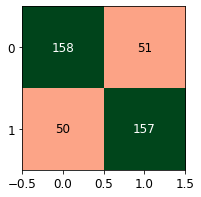

In [290]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import KFold
from museotoolbox.charts import PlotConfusionMatrix

from imblearn.over_sampling import SMOTE
oversample = SMOTE()

train_data, train_labels = oversample.fit_resample(features, features_labels)

#Create algorithm object
model = LDA()

conf_matrix_list_of_arrays = []
kf = KFold(7, shuffle=True, random_state=123)

for train_index, test_index  in kf.split(train_data):

   train_data1, test_data1 = train_data[train_index], train_data[test_index]
   train_labels1, test_labels1 = train_labels[train_index], train_labels[test_index]

   model.fit(train_data1, train_labels1)
   conf_matrix = confusion_matrix(test_labels1, model.predict(test_data1))
   conf_matrix_list_of_arrays .append(conf_matrix)


mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0).astype(np.int16)


pltCM = PlotConfusionMatrix(mean_of_conf_matrix_arrays.T) # Translate for Y = prediction and X = truth
pltCM.add_text()
# pltCM.add_f1()
pltCM.color_diagonal()
   

mean_of_conf_matrix_arrays.T

In [291]:
tp = 158
tn = 157
fp = 51
fn = 50

Accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)
F1_score = 2*tp/(2*tp+fp+fn)

print("Accuracy of the model is {:.4f}".format(Accuracy))
print("Recall of the model is {:.4f}".format(recall))
print("Precision of the model is {:.4f}".format(precision))
print("specificity of the model is {:.4f}".format(specificity))
print("F1_score of the model is {:.4f}".format(F1_score))
print("")

Accuracy of the model is 0.7572
Recall of the model is 0.7596
Precision of the model is 0.7560
specificity of the model is 0.7548
F1_score of the model is 0.7578



**RF**

array([[199,   5],
       [  9, 203]], dtype=int16)

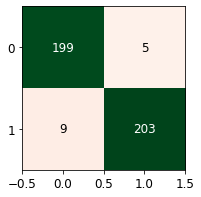

In [294]:
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.model_selection import KFold
from museotoolbox.charts import PlotConfusionMatrix

from imblearn.over_sampling import SMOTE
oversample = SMOTE()

train_data, train_labels = oversample.fit_resample(features, features_labels)

#Create algorithm object
model = RF()

conf_matrix_list_of_arrays = []
kf = KFold(7, shuffle=True, random_state=123)

for train_index, test_index  in kf.split(train_data):

   train_data1, test_data1 = train_data[train_index], train_data[test_index]
   train_labels1, test_labels1 = train_labels[train_index], train_labels[test_index]

   model.fit(train_data1, train_labels1)
   conf_matrix = confusion_matrix(test_labels1, model.predict(test_data1))
   conf_matrix_list_of_arrays .append(conf_matrix)


mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0).astype(np.int16)


pltCM = PlotConfusionMatrix(mean_of_conf_matrix_arrays.T) # Translate for Y = prediction and X = truth
pltCM.add_text()
# pltCM.add_f1()
pltCM.color_diagonal()
   

mean_of_conf_matrix_arrays.T

In [295]:
tp = 199
tn = 203
fp = 5
fn = 9

Accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)
F1_score = 2*tp/(2*tp+fp+fn)

print("Accuracy of the model is {:.4f}".format(Accuracy))
print("Recall of the model is {:.4f}".format(recall))
print("Precision of the model is {:.4f}".format(precision))
print("specificity of the model is {:.4f}".format(specificity))
print("F1_score of the model is {:.4f}".format(F1_score))
print("")

Accuracy of the model is 0.9663
Recall of the model is 0.9567
Precision of the model is 0.9755
specificity of the model is 0.9760
F1_score of the model is 0.9660



**SVC**

array([[392,  66],
       [ 95, 421]], dtype=int16)

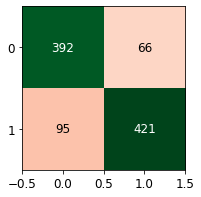

In [299]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from museotoolbox.charts import PlotConfusionMatrix

from imblearn.over_sampling import SMOTE
oversample = SMOTE()

train_data, train_labels = oversample.fit_resample(features, features_labels)

#Create algorithm object
model = SVC()

conf_matrix_list_of_arrays = []
kf = KFold(3, shuffle=True, random_state=123)

for train_index, test_index  in kf.split(train_data):

   train_data1, test_data1 = train_data[train_index], train_data[test_index]
   train_labels1, test_labels1 = train_labels[train_index], train_labels[test_index]

   model.fit(train_data1, train_labels1)
   conf_matrix = confusion_matrix(test_labels1, model.predict(test_data1))
   conf_matrix_list_of_arrays .append(conf_matrix)


mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0).astype(np.int16)


pltCM = PlotConfusionMatrix(mean_of_conf_matrix_arrays.T) # Translate for Y = prediction and X = truth
pltCM.add_text()
# pltCM.add_f1()
pltCM.color_diagonal()
   

mean_of_conf_matrix_arrays.T

In [300]:
tp = 392
tn = 421
fp = 66
fn = 95

Accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)
F1_score = 2*tp/(2*tp+fp+fn)

print("Accuracy of the model is {:.4f}".format(Accuracy))
print("Recall of the model is {:.4f}".format(recall))
print("Precision of the model is {:.4f}".format(precision))
print("specificity of the model is {:.4f}".format(specificity))
print("F1_score of the model is {:.4f}".format(F1_score))
print("")

Accuracy of the model is 0.8347
Recall of the model is 0.8049
Precision of the model is 0.8559
specificity of the model is 0.8645
F1_score of the model is 0.8296



**AdaBoost**

array([[171,  28],
       [ 37, 180]], dtype=int16)

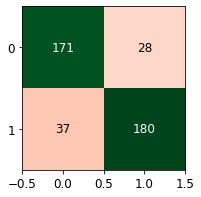

In [303]:
from sklearn.ensemble import AdaBoostClassifier as ADB
from sklearn.model_selection import KFold
from museotoolbox.charts import PlotConfusionMatrix

from imblearn.over_sampling import SMOTE
oversample = SMOTE()

train_data, train_labels = oversample.fit_resample(features, features_labels)

#Create algorithm object
model = ADB()

conf_matrix_list_of_arrays = []
kf = KFold(7, shuffle=True, random_state=123)

for train_index, test_index  in kf.split(train_data):

   train_data1, test_data1 = train_data[train_index], train_data[test_index]
   train_labels1, test_labels1 = train_labels[train_index], train_labels[test_index]

   model.fit(train_data1, train_labels1)
   conf_matrix = confusion_matrix(test_labels1, model.predict(test_data1))
   conf_matrix_list_of_arrays .append(conf_matrix)


mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0).astype(np.int16)


pltCM = PlotConfusionMatrix(mean_of_conf_matrix_arrays.T) # Translate for Y = prediction and X = truth
pltCM.add_text()
# pltCM.add_f1()
pltCM.color_diagonal()
   

mean_of_conf_matrix_arrays.T

In [304]:
tp = 171
tn = 180
fp = 28
fn = 37

Accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)
F1_score = 2*tp/(2*tp+fp+fn)

print("Accuracy of the model is {:.4f}".format(Accuracy))
print("Recall of the model is {:.4f}".format(recall))
print("Precision of the model is {:.4f}".format(precision))
print("specificity of the model is {:.4f}".format(specificity))
print("F1_score of the model is {:.4f}".format(F1_score))
print("")

Accuracy of the model is 0.8438
Recall of the model is 0.8221
Precision of the model is 0.8593
specificity of the model is 0.8654
F1_score of the model is 0.8403



**GBT**

array([[182,   9],
       [ 26, 200]], dtype=int16)

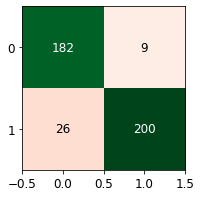

In [306]:
from sklearn.ensemble import GradientBoostingClassifier as GBT
from sklearn.model_selection import KFold
from museotoolbox.charts import PlotConfusionMatrix

from imblearn.over_sampling import SMOTE
oversample = SMOTE()

train_data, train_labels = oversample.fit_resample(features, features_labels)

#Create algorithm object
model = GBT()

conf_matrix_list_of_arrays = []
kf = KFold(7, shuffle=True, random_state=123)

for train_index, test_index  in kf.split(train_data):

   train_data1, test_data1 = train_data[train_index], train_data[test_index]
   train_labels1, test_labels1 = train_labels[train_index], train_labels[test_index]

   model.fit(train_data1, train_labels1)
   conf_matrix = confusion_matrix(test_labels1, model.predict(test_data1))
   conf_matrix_list_of_arrays .append(conf_matrix)


mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0).astype(np.int16)


pltCM = PlotConfusionMatrix(mean_of_conf_matrix_arrays.T) # Translate for Y = prediction and X = truth
pltCM.add_text()
# pltCM.add_f1()
pltCM.color_diagonal()
   

mean_of_conf_matrix_arrays.T

In [308]:
tp = 182
tn = 200
fp = 9
fn = 26

Accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)
F1_score = 2*tp/(2*tp+fp+fn)

print("Accuracy of the model is {:.4f}".format(Accuracy))
print("Recall of the model is {:.4f}".format(recall))
print("Precision of the model is {:.4f}".format(precision))
print("specificity of the model is {:.4f}".format(specificity))
print("F1_score of the model is {:.4f}".format(F1_score))
print("")

Accuracy of the model is 0.9161
Recall of the model is 0.8750
Precision of the model is 0.9529
specificity of the model is 0.9569
F1_score of the model is 0.9123



# **Model Building Using SVMSMOTE Data Balancing**

# Data training and testing split 80|20

**MLP**

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


<Figure size 432x288 with 0 Axes>

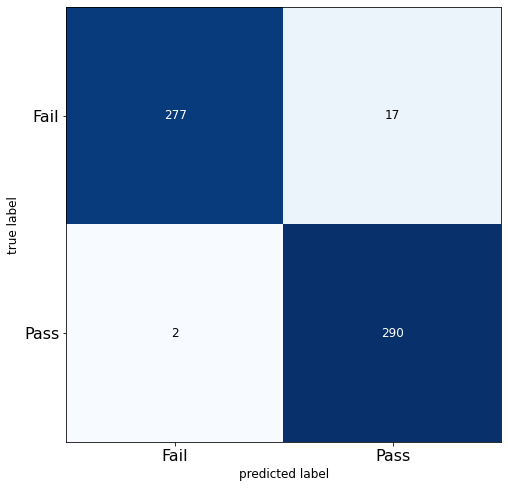

Accuracy of the model is 0.9676
Recall of the model is 0.9932
Precision of the model is 0.9446
specificity of the model is 0.9422
F1_score of the model is 0.9683
AUC Score :  0.9676637778399031


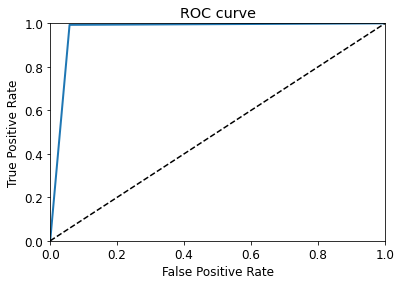

In [324]:
from sklearn.neural_network import MLPClassifier as MLP

from imblearn.over_sampling import SVMSMOTE
oversample = SVMSMOTE()

X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = MLP()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)

# plotting the AUC for all my classes

get_model_ROC_AUC_curve(preds, test_labels)

XGBoost

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 432x288 with 0 Axes>

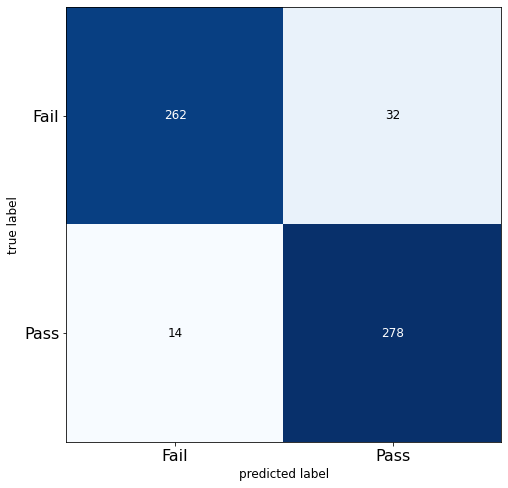

Accuracy of the model is 0.9215
Recall of the model is 0.9521
Precision of the model is 0.8968
specificity of the model is 0.8912
F1_score of the model is 0.9236
AUC Score :  0.9216056285527909


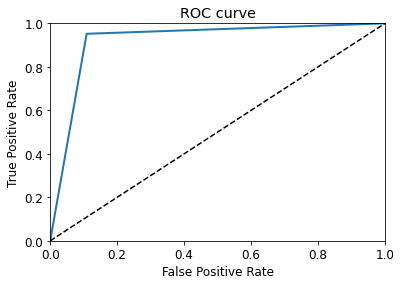

In [333]:
from xgboost.sklearn import XGBClassifier
from imblearn.over_sampling import SVMSMOTE
oversample = SVMSMOTE()

X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = XGBClassifier()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)

# plotting the AUC for all my classes

get_model_ROC_AUC_curve(preds, test_labels)

LR

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<Figure size 432x288 with 0 Axes>

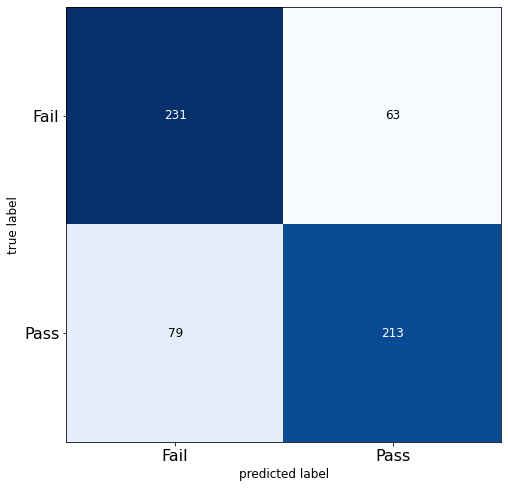

Accuracy of the model is 0.7577
Recall of the model is 0.7295
Precision of the model is 0.7717
specificity of the model is 0.7857
F1_score of the model is 0.7500
AUC Score :  0.7575831702544031


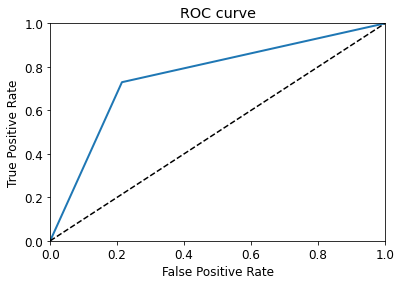

In [336]:
from sklearn.linear_model import LogisticRegression as LR
from imblearn.over_sampling import SVMSMOTE
oversample = SVMSMOTE()

X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = LR()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)

# plotting the AUC for all my classes

get_model_ROC_AUC_curve(preds, test_labels)

DT

<Figure size 432x288 with 0 Axes>

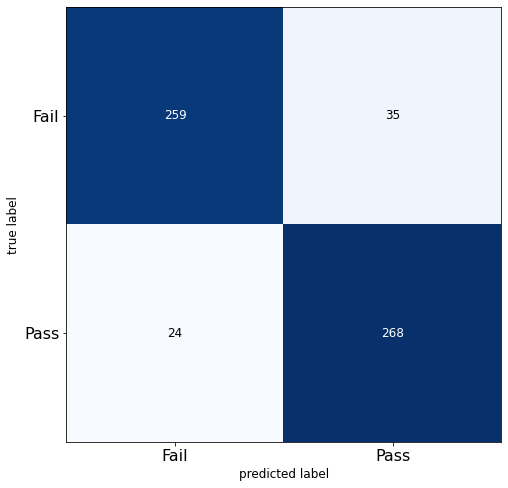

Accuracy of the model is 0.8993
Recall of the model is 0.9178
Precision of the model is 0.8845
specificity of the model is 0.8810
F1_score of the model is 0.9008
AUC Score :  0.8993803000652316


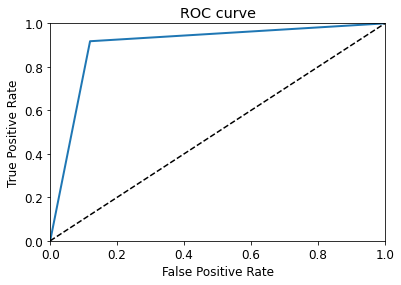

In [390]:
from sklearn.tree import DecisionTreeClassifier as DT
from imblearn.over_sampling import SVMSMOTE
oversample = SVMSMOTE()

X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = DT()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)

# plotting the AUC for all my classes

get_model_ROC_AUC_curve(preds, test_labels)

NB

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 432x288 with 0 Axes>

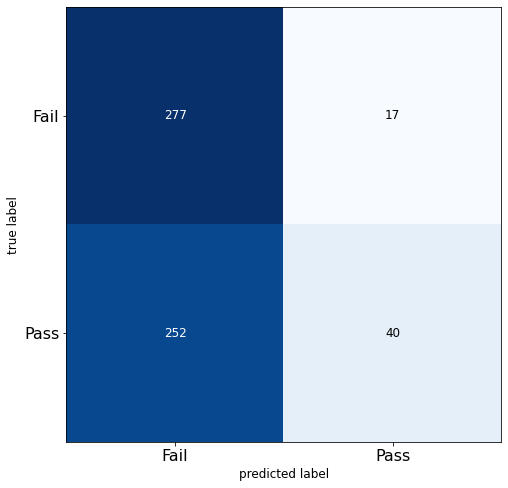

Accuracy of the model is 0.5410
Recall of the model is 0.1370
Precision of the model is 0.7018
specificity of the model is 0.9422
F1_score of the model is 0.2292
AUC Score :  0.5395815860590812


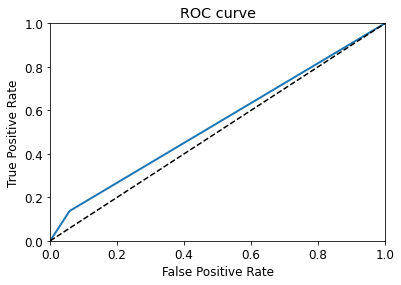

In [396]:
from sklearn.naive_bayes import GaussianNB as NB
from imblearn.over_sampling import SVMSMOTE
oversample = SVMSMOTE()

X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = NB()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)

# plotting the AUC for all my classes

get_model_ROC_AUC_curve(preds, test_labels)

LDA

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


<Figure size 432x288 with 0 Axes>

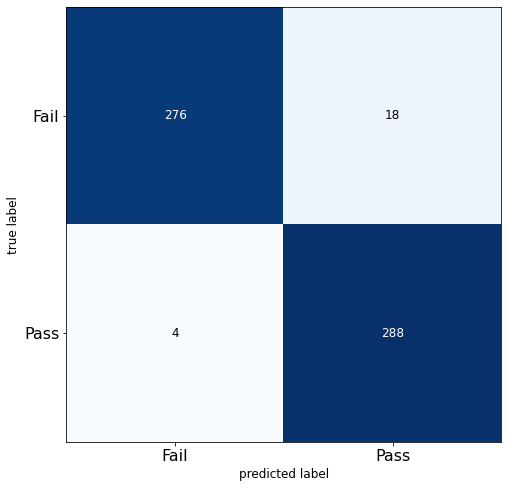

Accuracy of the model is 0.9625
Recall of the model is 0.9863
Precision of the model is 0.9412
specificity of the model is 0.9388
F1_score of the model is 0.9632
AUC Score :  0.9625384400335476


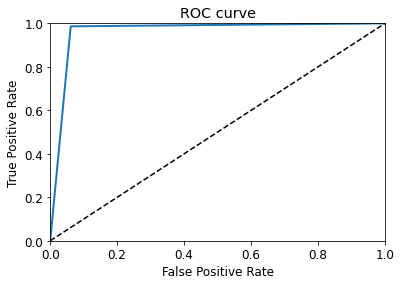

In [413]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from imblearn.over_sampling import SVMSMOTE
oversample = SVMSMOTE()

X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = MLP()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)

# plotting the AUC for all my classes

get_model_ROC_AUC_curve(preds, test_labels)

RF

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


<Figure size 432x288 with 0 Axes>

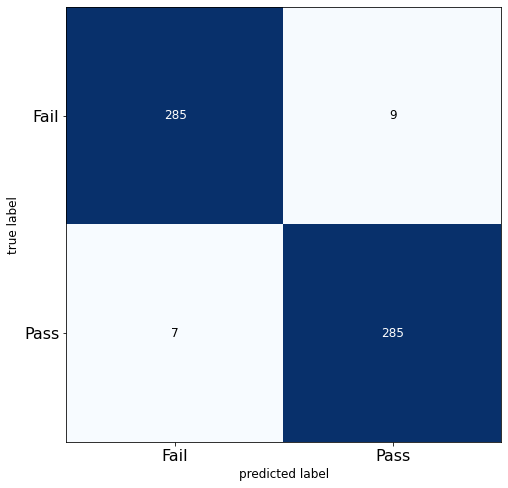

Accuracy of the model is 0.9727
Recall of the model is 0.9760
Precision of the model is 0.9694
specificity of the model is 0.9694
F1_score of the model is 0.9727
AUC Score :  0.9727075761811573


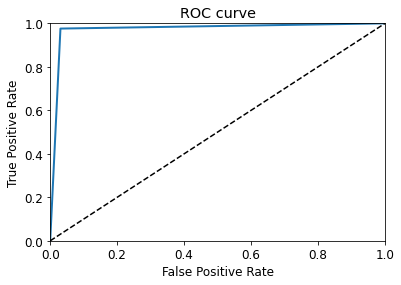

In [421]:
from sklearn.ensemble import RandomForestClassifier as RF
from imblearn.over_sampling import SVMSMOTE
oversample = SVMSMOTE()

X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = RF()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)

# plotting the AUC for all my classes

get_model_ROC_AUC_curve(preds, test_labels)

SVC

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 432x288 with 0 Axes>

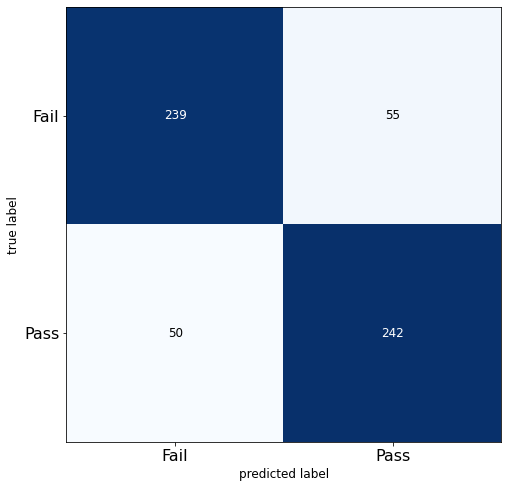

Accuracy of the model is 0.8208
Recall of the model is 0.8288
Precision of the model is 0.8148
specificity of the model is 0.8129
F1_score of the model is 0.8217
AUC Score :  0.8208461466778493


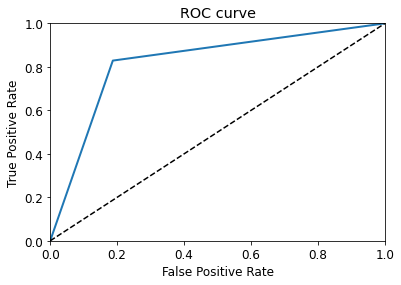

In [424]:
from sklearn.svm import SVC
from imblearn.over_sampling import SVMSMOTE
oversample = SVMSMOTE()

X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = SVC()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)

# plotting the AUC for all my classes

get_model_ROC_AUC_curve(preds, test_labels)

AdaBoost

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 432x288 with 0 Axes>

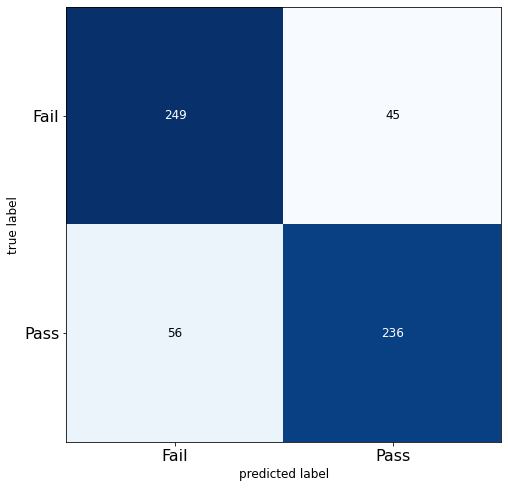

Accuracy of the model is 0.8276
Recall of the model is 0.8082
Precision of the model is 0.8399
specificity of the model is 0.8469
F1_score of the model is 0.8237
AUC Score :  0.827578976796198


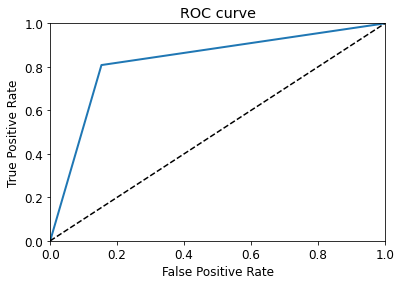

In [427]:
from sklearn.ensemble import AdaBoostClassifier as ADB
from imblearn.over_sampling import SVMSMOTE
oversample = SVMSMOTE()

X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = ADB()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)

# plotting the AUC for all my classes

get_model_ROC_AUC_curve(preds, test_labels)

GTB

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 432x288 with 0 Axes>

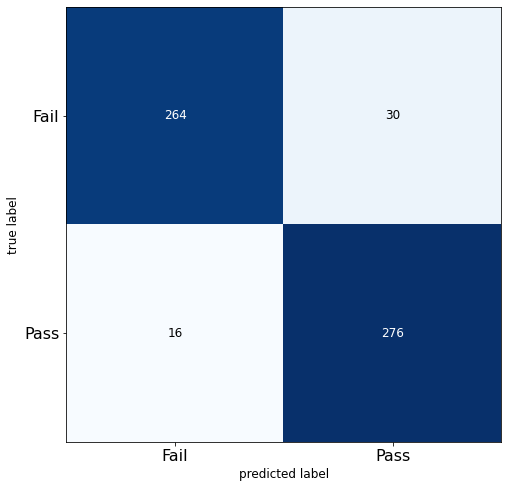

Accuracy of the model is 0.9215
Recall of the model is 0.9452
Precision of the model is 0.9020
specificity of the model is 0.8980
F1_score of the model is 0.9231
AUC Score :  0.921582331562762


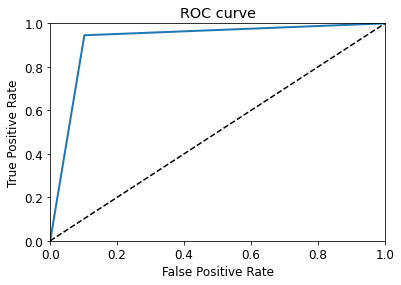

In [431]:
from sklearn.ensemble import GradientBoostingClassifier as GBT
from imblearn.over_sampling import SVMSMOTE
oversample = SVMSMOTE()

X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = GBT()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)

# plotting the AUC for all my classes

get_model_ROC_AUC_curve(preds, test_labels)

# K-Fold CV

In [432]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, cross_validate
from sklearn.pipeline import make_pipeline

features, features_labels = oversample.fit_resample(features, features_labels)

# Create standardizer
standardizer = StandardScaler()

# Create logistic regression object
logit = SVC()
# Create a pipeline that standardizes, then runs logistic regression
pipeline = make_pipeline(standardizer, logit)
# Create k-Fold cross-validation
kf = KFold(n_splits=7, shuffle=True, random_state=1)
# Conduct k-fold cross-validation
cv_results = cross_val_score(logit, # Pipeline
                              features, # Feature matrix
                              features_labels, # Target vector
                              cv=kf, # Cross-validation technique
                              scoring="precision", # Loss function
                              n_jobs=-1) # Use all CPU scores
# Calculate mean
cv_results.mean()

0.8235264678919744

In [ ]:
!pip install museotoolbox

**SVC**

array([[169,  25],
       [ 39, 184]], dtype=int16)

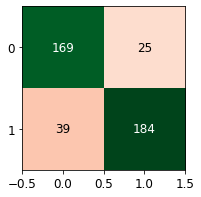

In [435]:

from sklearn.model_selection import KFold
from museotoolbox.charts import PlotConfusionMatrix

from imblearn.over_sampling import SVMSMOTE

oversample = SVMSMOTE()
train_data, train_labels = oversample.fit_resample(features, features_labels)

#Create algorithm object

model = SVC()

conf_matrix_list_of_arrays = []
kf = KFold(7, shuffle=True, random_state=123)

for train_index, test_index  in kf.split(train_data):

   train_data1, test_data1 = train_data[train_index], train_data[test_index]
   train_labels1, test_labels1 = train_labels[train_index], train_labels[test_index]

   model.fit(train_data1, train_labels1)
   conf_matrix = confusion_matrix(test_labels1, model.predict(test_data1))
   conf_matrix_list_of_arrays .append(conf_matrix)


mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0).astype(np.int16)


pltCM = PlotConfusionMatrix(mean_of_conf_matrix_arrays.T) # Translate for Y = prediction and X = truth
pltCM.add_text()
# pltCM.add_f1()
pltCM.color_diagonal()
   

mean_of_conf_matrix_arrays.T

In [436]:
tp = 169
tn = 184
fp = 25
fn = 39

Accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)
F1_score = 2*tp/(2*tp+fp+fn)

print("Accuracy of the model is {:.4f}".format(Accuracy))
print("Recall of the model is {:.4f}".format(recall))
print("Precision of the model is {:.4f}".format(precision))
print("specificity of the model is {:.4f}".format(specificity))
print("F1_score of the model is {:.4f}".format(F1_score))
print("")

Accuracy of the model is 0.8465
Recall of the model is 0.8125
Precision of the model is 0.8711
specificity of the model is 0.8804
F1_score of the model is 0.8408



**XGBoost**

array([[ 97,   4],
       [ 15, 107]], dtype=int16)

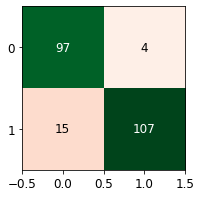

In [438]:

from sklearn.model_selection import KFold
from museotoolbox.charts import PlotConfusionMatrix

from imblearn.over_sampling import SVMSMOTE

oversample = SVMSMOTE()
train_data, train_labels = oversample.fit_resample(features, features_labels)

#Create algorithm object
model = XGBClassifier()

conf_matrix_list_of_arrays = []
kf = KFold(13, shuffle=True, random_state=123)

for train_index, test_index  in kf.split(train_data):

   train_data1, test_data1 = train_data[train_index], train_data[test_index]
   train_labels1, test_labels1 = train_labels[train_index], train_labels[test_index]

   model.fit(train_data1, train_labels1)
   conf_matrix = confusion_matrix(test_labels1, model.predict(test_data1))
   conf_matrix_list_of_arrays .append(conf_matrix)


mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0).astype(np.int16)


pltCM = PlotConfusionMatrix(mean_of_conf_matrix_arrays.T) # Translate for Y = prediction and X = truth
pltCM.add_text()
# pltCM.add_f1()
pltCM.color_diagonal()
   

mean_of_conf_matrix_arrays.T

In [439]:
tp = 97
tn = 107
fp = 4
fn = 15

Accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)
F1_score = 2*tp/(2*tp+fp+fn)

print("Accuracy of the model is {:.4f}".format(Accuracy))
print("Recall of the model is {:.4f}".format(recall))
print("Precision of the model is {:.4f}".format(precision))
print("specificity of the model is {:.4f}".format(specificity))
print("F1_score of the model is {:.4f}".format(F1_score))
print("")

Accuracy of the model is 0.9148
Recall of the model is 0.8661
Precision of the model is 0.9604
specificity of the model is 0.9640
F1_score of the model is 0.9108



**RF**

array([[198,   5],
       [ 10, 203]], dtype=int16)

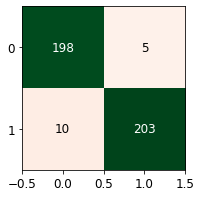

In [442]:
from sklearn.model_selection import KFold
from museotoolbox.charts import PlotConfusionMatrix


from imblearn.over_sampling import SVMSMOTE

oversample = SVMSMOTE()
train_data, train_labels = oversample.fit_resample(features, features_labels)

#Create algorithm object
model = RandomForestClassifier()

conf_matrix_list_of_arrays = []
kf = KFold(7, shuffle=True, random_state=123)

for train_index, test_index  in kf.split(train_data):

   train_data1, test_data1 = train_data[train_index], train_data[test_index]
   train_labels1, test_labels1 = train_labels[train_index], train_labels[test_index]

   model.fit(train_data1, train_labels1)
   conf_matrix = confusion_matrix(test_labels1, model.predict(test_data1))
   conf_matrix_list_of_arrays .append(conf_matrix)


mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0).astype(np.int16)


pltCM = PlotConfusionMatrix(mean_of_conf_matrix_arrays.T) # Translate for Y = prediction and X = truth
pltCM.add_text()
# pltCM.add_f1()
pltCM.color_diagonal()
   

mean_of_conf_matrix_arrays.T

In [443]:
tp = 198
tn = 203
fp = 5
fn = 10

Accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)
F1_score = 2*tp/(2*tp+fp+fn)

print("Accuracy of the model is {:.4f}".format(Accuracy))
print("Recall of the model is {:.4f}".format(recall))
print("Precision of the model is {:.4f}".format(precision))
print("specificity of the model is {:.4f}".format(specificity))
print("F1_score of the model is {:.4f}".format(F1_score))
print("")

Accuracy of the model is 0.9639
Recall of the model is 0.9519
Precision of the model is 0.9754
specificity of the model is 0.9760
F1_score of the model is 0.9635



**LR**

array([[160,  49],
       [ 48, 159]], dtype=int16)

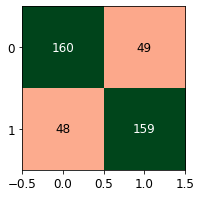

In [446]:

from sklearn.model_selection import KFold
from museotoolbox.charts import PlotConfusionMatrix

from imblearn.over_sampling import SVMSMOTE

oversample = SVMSMOTE()
train_data, train_labels = oversample.fit_resample(features, features_labels)

#Create algorithm object
model = LR(max_iter=300)

conf_matrix_list_of_arrays = []
kf = KFold(7, shuffle=True, random_state=123)

for train_index, test_index  in kf.split(train_data):

   train_data1, test_data1 = train_data[train_index], train_data[test_index]
   train_labels1, test_labels1 = train_labels[train_index], train_labels[test_index]

   model.fit(train_data1, train_labels1)
   conf_matrix = confusion_matrix(test_labels1, model.predict(test_data1))
   conf_matrix_list_of_arrays .append(conf_matrix)


mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0).astype(np.int16)


pltCM = PlotConfusionMatrix(mean_of_conf_matrix_arrays.T) # Translate for Y = prediction and X = truth
pltCM.add_text()
# pltCM.add_f1()
pltCM.color_diagonal()
   

mean_of_conf_matrix_arrays.T

In [447]:
tp = 160
tn = 159
fp = 49
fn = 48

Accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)
F1_score = 2*tp/(2*tp+fp+fn)

print("Accuracy of the model is {:.4f}".format(Accuracy))
print("Recall of the model is {:.4f}".format(recall))
print("Precision of the model is {:.4f}".format(precision))
print("specificity of the model is {:.4f}".format(specificity))
print("F1_score of the model is {:.4f}".format(F1_score))
print("")

Accuracy of the model is 0.7668
Recall of the model is 0.7692
Precision of the model is 0.7656
specificity of the model is 0.7644
F1_score of the model is 0.7674



**KNN**

array([[156,   0],
       [ 52, 209]], dtype=int16)

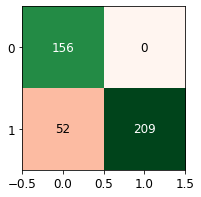

In [449]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import KFold
from museotoolbox.charts import PlotConfusionMatrix
from imblearn.over_sampling import SVMSMOTE

oversample = SVMSMOTE()
train_data, train_labels = oversample.fit_resample(features, features_labels)

#Create algorithm object
model = KNN(n_neighbors=3)

conf_matrix_list_of_arrays = []
kf = KFold(7, shuffle=True, random_state=123)

for train_index, test_index  in kf.split(train_data):

   train_data1, test_data1 = train_data[train_index], train_data[test_index]
   train_labels1, test_labels1 = train_labels[train_index], train_labels[test_index]

   model.fit(train_data1, train_labels1)
   conf_matrix = confusion_matrix(test_labels1, model.predict(test_data1))
   conf_matrix_list_of_arrays .append(conf_matrix)


mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0).astype(np.int16)


pltCM = PlotConfusionMatrix(mean_of_conf_matrix_arrays.T) # Translate for Y = prediction and X = truth
pltCM.add_text()
# pltCM.add_f1()
pltCM.color_diagonal()
   

mean_of_conf_matrix_arrays.T

In [450]:
tp = 156
tn = 209
fp = 0
fn = 52

Accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)
F1_score = 2*tp/(2*tp+fp+fn)

print("Accuracy of the model is {:.4f}".format(Accuracy))
print("Recall of the model is {:.4f}".format(recall))
print("Precision of the model is {:.4f}".format(precision))
print("specificity of the model is {:.4f}".format(specificity))
print("F1_score of the model is {:.4f}".format(F1_score))
print("")

Accuracy of the model is 0.8753
Recall of the model is 0.7500
Precision of the model is 1.0000
specificity of the model is 1.0000
F1_score of the model is 0.8571



**DT**

array([[123,  12],
       [ 23, 134]], dtype=int16)

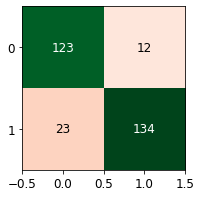

In [452]:
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.model_selection import KFold
from museotoolbox.charts import PlotConfusionMatrix
from imblearn.over_sampling import SVMSMOTE

oversample = SVMSMOTE()
train_data, train_labels = oversample.fit_resample(features, features_labels)

#Create algorithm object
model = DT()

conf_matrix_list_of_arrays = []
kf = KFold(10, shuffle=True, random_state=123)

for train_index, test_index  in kf.split(train_data):

   train_data1, test_data1 = train_data[train_index], train_data[test_index]
   train_labels1, test_labels1 = train_labels[train_index], train_labels[test_index]

   model.fit(train_data1, train_labels1)
   conf_matrix = confusion_matrix(test_labels1, model.predict(test_data1))
   conf_matrix_list_of_arrays .append(conf_matrix)


mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0).astype(np.int16)


pltCM = PlotConfusionMatrix(mean_of_conf_matrix_arrays.T) # Translate for Y = prediction and X = truth
pltCM.add_text()
# pltCM.add_f1()
pltCM.color_diagonal()
   

mean_of_conf_matrix_arrays.T

In [453]:
tp = 123
tn = 134
fp = 12
fn = 23

Accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)
F1_score = 2*tp/(2*tp+fp+fn)

print("Accuracy of the model is {:.4f}".format(Accuracy))
print("Recall of the model is {:.4f}".format(recall))
print("Precision of the model is {:.4f}".format(precision))
print("specificity of the model is {:.4f}".format(specificity))
print("F1_score of the model is {:.4f}".format(F1_score))
print("")

Accuracy of the model is 0.8801
Recall of the model is 0.8425
Precision of the model is 0.9111
specificity of the model is 0.9178
F1_score of the model is 0.8754



**NB**

array([[197, 178],
       [ 12,  30]], dtype=int16)

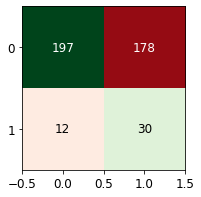

In [456]:
from sklearn.naive_bayes import GaussianNB as NB

from sklearn.model_selection import KFold
from museotoolbox.charts import PlotConfusionMatrix

from imblearn.over_sampling import SVMSMOTE
oversample = SVMSMOTE()

train_data, train_labels = oversample.fit_resample(features, features_labels)

#Create algorithm object
model = NB()

conf_matrix_list_of_arrays = []
kf = KFold(7, shuffle=True, random_state=123)

for train_index, test_index  in kf.split(train_data):

   train_data1, test_data1 = train_data[train_index], train_data[test_index]
   train_labels1, test_labels1 = train_labels[train_index], train_labels[test_index]

   model.fit(train_data1, train_labels1)
   conf_matrix = confusion_matrix(test_labels1, model.predict(test_data1))
   conf_matrix_list_of_arrays .append(conf_matrix)


mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0).astype(np.int16)


pltCM = PlotConfusionMatrix(mean_of_conf_matrix_arrays.T) # Translate for Y = prediction and X = truth
pltCM.add_text()
# pltCM.add_f1()
pltCM.color_diagonal()
   

mean_of_conf_matrix_arrays.T

In [457]:
tp = 197
tn = 30
fp = 178
fn = 12

Accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)
F1_score = 2*tp/(2*tp+fp+fn)

print("Accuracy of the model is {:.4f}".format(Accuracy))
print("Recall of the model is {:.4f}".format(recall))
print("Precision of the model is {:.4f}".format(precision))
print("specificity of the model is {:.4f}".format(specificity))
print("F1_score of the model is {:.4f}".format(F1_score))
print("")

Accuracy of the model is 0.5444
Recall of the model is 0.9426
Precision of the model is 0.5253
specificity of the model is 0.1442
F1_score of the model is 0.6747



**LDA**

array([[158,  51],
       [ 50, 157]], dtype=int16)

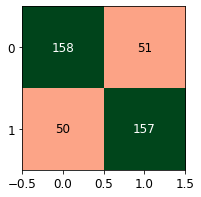

In [461]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import KFold
from museotoolbox.charts import PlotConfusionMatrix

from imblearn.over_sampling import SVMSMOTE

oversample = SVMSMOTE()
train_data, train_labels = oversample.fit_resample(features, features_labels)

#Create algorithm object
model = LDA()

conf_matrix_list_of_arrays = []
kf = KFold(7, shuffle=True, random_state=123)

for train_index, test_index  in kf.split(train_data):

   train_data1, test_data1 = train_data[train_index], train_data[test_index]
   train_labels1, test_labels1 = train_labels[train_index], train_labels[test_index]

   model.fit(train_data1, train_labels1)
   conf_matrix = confusion_matrix(test_labels1, model.predict(test_data1))
   conf_matrix_list_of_arrays .append(conf_matrix)


mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0).astype(np.int16)


pltCM = PlotConfusionMatrix(mean_of_conf_matrix_arrays.T) # Translate for Y = prediction and X = truth
pltCM.add_text()
# pltCM.add_f1()
pltCM.color_diagonal()
   

mean_of_conf_matrix_arrays.T

In [462]:
tp = 158
tn = 157
fp = 51
fn = 50

Accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)
F1_score = 2*tp/(2*tp+fp+fn)

print("Accuracy of the model is {:.4f}".format(Accuracy))
print("Recall of the model is {:.4f}".format(recall))
print("Precision of the model is {:.4f}".format(precision))
print("specificity of the model is {:.4f}".format(specificity))
print("F1_score of the model is {:.4f}".format(F1_score))
print("")

Accuracy of the model is 0.7572
Recall of the model is 0.7596
Precision of the model is 0.7560
specificity of the model is 0.7548
F1_score of the model is 0.7578



**ADABOOST**

array([[171,  28],
       [ 37, 180]], dtype=int16)

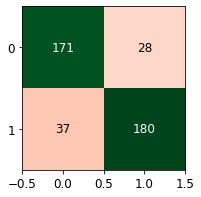

In [464]:
from sklearn.ensemble import AdaBoostClassifier as ADB

from sklearn.model_selection import KFold
from museotoolbox.charts import PlotConfusionMatrix

from imblearn.over_sampling import SVMSMOTE

oversample = SVMSMOTE()
train_data, train_labels = oversample.fit_resample(features, features_labels)

#Create algorithm object
model = ADB()

conf_matrix_list_of_arrays = []
kf = KFold(7, shuffle=True, random_state=123)

for train_index, test_index  in kf.split(train_data):

   train_data1, test_data1 = train_data[train_index], train_data[test_index]
   train_labels1, test_labels1 = train_labels[train_index], train_labels[test_index]

   model.fit(train_data1, train_labels1)
   conf_matrix = confusion_matrix(test_labels1, model.predict(test_data1))
   conf_matrix_list_of_arrays .append(conf_matrix)


mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0).astype(np.int16)


pltCM = PlotConfusionMatrix(mean_of_conf_matrix_arrays.T) # Translate for Y = prediction and X = truth
pltCM.add_text()
# pltCM.add_f1()
pltCM.color_diagonal()
   

mean_of_conf_matrix_arrays.T

In [465]:
tp = 171
tn = 180
fp = 28
fn = 37 

Accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)
F1_score = 2*tp/(2*tp+fp+fn)

print("Accuracy of the model is {:.4f}".format(Accuracy))
print("Recall of the model is {:.4f}".format(recall))
print("Precision of the model is {:.4f}".format(precision))
print("specificity of the model is {:.4f}".format(specificity))
print("F1_score of the model is {:.4f}".format(F1_score))
print("")

Accuracy of the model is 0.8438
Recall of the model is 0.8221
Precision of the model is 0.8593
specificity of the model is 0.8654
F1_score of the model is 0.8403



**GTB**

array([[182,   9],
       [ 26, 200]], dtype=int16)

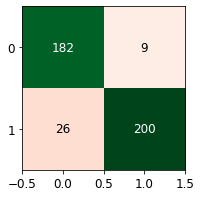

In [467]:
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.model_selection import KFold
from museotoolbox.charts import PlotConfusionMatrix

from imblearn.over_sampling import SVMSMOTE

oversample = SVMSMOTE()
train_data, train_labels = oversample.fit_resample(features, features_labels)

#Create algorithm object
model = GBC()

conf_matrix_list_of_arrays = []
kf = KFold(7, shuffle=True, random_state=123)

for train_index, test_index  in kf.split(train_data):

   train_data1, test_data1 = train_data[train_index], train_data[test_index]
   train_labels1, test_labels1 = train_labels[train_index], train_labels[test_index]

   model.fit(train_data1, train_labels1)
   conf_matrix = confusion_matrix(test_labels1, model.predict(test_data1))
   conf_matrix_list_of_arrays .append(conf_matrix)


mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0).astype(np.int16)


pltCM = PlotConfusionMatrix(mean_of_conf_matrix_arrays.T) # Translate for Y = prediction and X = truth
pltCM.add_text()
# pltCM.add_f1()
pltCM.color_diagonal()
   

mean_of_conf_matrix_arrays.T

In [468]:
tp = 182
tn = 200
fp = 9
fn = 26

Accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)
F1_score = 2*tp/(2*tp+fp+fn)

print("Accuracy of the model is {:.4f}".format(Accuracy))
print("Recall of the model is {:.4f}".format(recall))
print("Precision of the model is {:.4f}".format(precision))
print("specificity of the model is {:.4f}".format(specificity))
print("F1_score of the model is {:.4f}".format(F1_score))
print("")

Accuracy of the model is 0.9161
Recall of the model is 0.8750
Precision of the model is 0.9529
specificity of the model is 0.9569
F1_score of the model is 0.9123



MLP

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array([[193,   0],
       [ 15, 208]], dtype=int16)

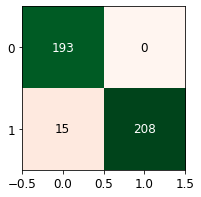

In [470]:
 from sklearn.neural_network import MLPClassifier as MLP

 from sklearn.model_selection import KFold
from museotoolbox.charts import PlotConfusionMatrix

from imblearn.over_sampling import SVMSMOTE

oversample = SVMSMOTE()
train_data, train_labels = oversample.fit_resample(features, features_labels)

#Create algorithm object
model = MLP()

conf_matrix_list_of_arrays = []
kf = KFold(7, shuffle=True, random_state=123)

for train_index, test_index  in kf.split(train_data):

   train_data1, test_data1 = train_data[train_index], train_data[test_index]
   train_labels1, test_labels1 = train_labels[train_index], train_labels[test_index]

   model.fit(train_data1, train_labels1)
   conf_matrix = confusion_matrix(test_labels1, model.predict(test_data1))
   conf_matrix_list_of_arrays .append(conf_matrix)


mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0).astype(np.int16)


pltCM = PlotConfusionMatrix(mean_of_conf_matrix_arrays.T) # Translate for Y = prediction and X = truth
pltCM.add_text()
# pltCM.add_f1()
pltCM.color_diagonal()
   

mean_of_conf_matrix_arrays.T

In [471]:
tp = 193
tn = 208
fp = 0
fn = 15

Accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)
F1_score = 2*tp/(2*tp+fp+fn)

print("Accuracy of the model is {:.4f}".format(Accuracy))
print("Recall of the model is {:.4f}".format(recall))
print("Precision of the model is {:.4f}".format(precision))
print("specificity of the model is {:.4f}".format(specificity))
print("F1_score of the model is {:.4f}".format(F1_score))
print("")

Accuracy of the model is 0.9639
Recall of the model is 0.9279
Precision of the model is 1.0000
specificity of the model is 1.0000
F1_score of the model is 0.9626



# **Model Building Using ADASYN Data Balancing**

# Data training and testing Split, 80|20

MLP

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


<Figure size 432x288 with 0 Axes>

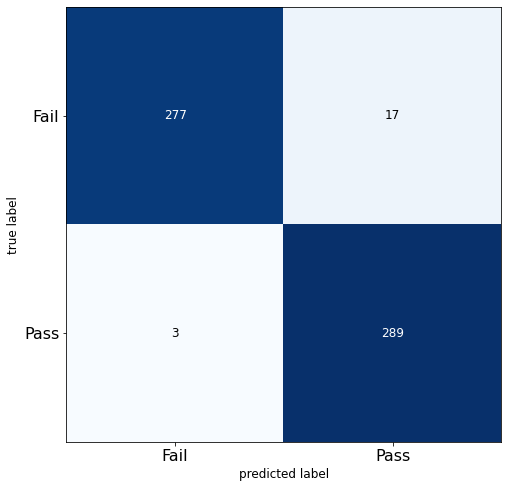

Accuracy of the model is 0.9659
Recall of the model is 0.9897
Precision of the model is 0.9444
specificity of the model is 0.9422
F1_score of the model is 0.9666
AUC Score :  0.9659514490727797


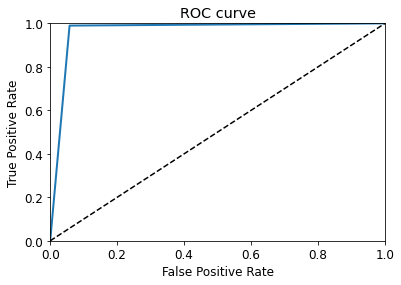

In [474]:
 from sklearn.neural_network import MLPClassifier as MLP
 from imblearn.over_sampling import ADASYN

oversample = ADASYN()


X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = MLP()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)

# plotting the AUC for all my classes

get_model_ROC_AUC_curve(preds, test_labels)

**XGBoost**

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 432x288 with 0 Axes>

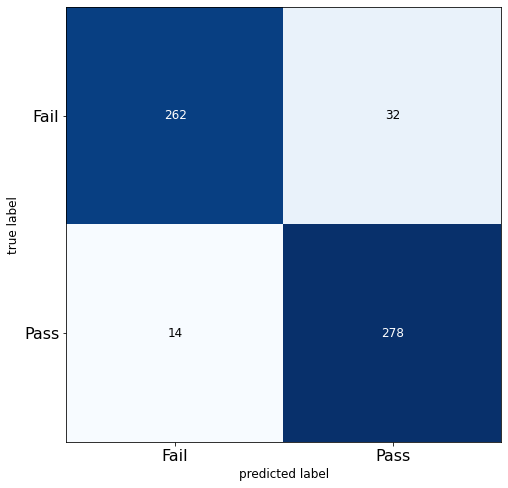

Accuracy of the model is 0.9215
Recall of the model is 0.9521
Precision of the model is 0.8968
specificity of the model is 0.8912
F1_score of the model is 0.9236
AUC Score :  0.9216056285527909


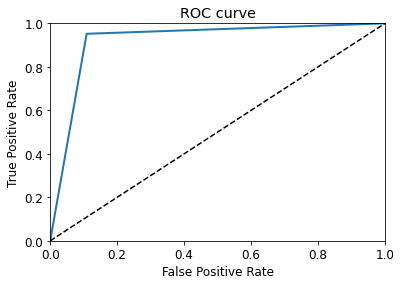

In [478]:
from xgboost.sklearn import XGBClassifier

from imblearn.over_sampling import ADASYN

oversample = ADASYN()


X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

XG_model = XGBClassifier()

XG_model.fit(train_data, train_labels)

XG_preds = XG_model.predict(test_data)

get_Evaluation_matrics(XG_preds, test_labels)

# plotting the AUC for all my classes
get_model_ROC_AUC_curve(XG_preds, test_labels)

**LR**

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<Figure size 432x288 with 0 Axes>

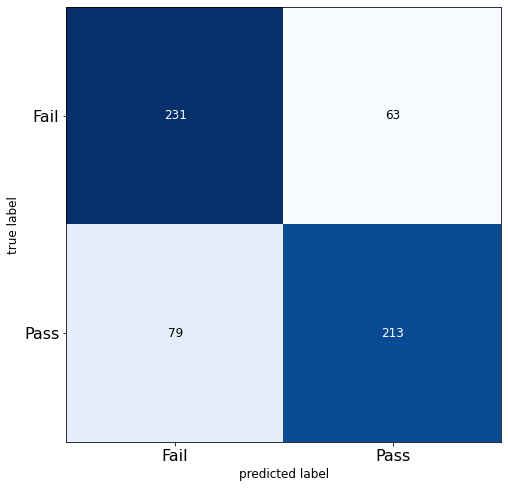

Accuracy of the model is 0.7577
Recall of the model is 0.7295
Precision of the model is 0.7717
specificity of the model is 0.7857
F1_score of the model is 0.7500
AUC Score :  0.7575831702544031


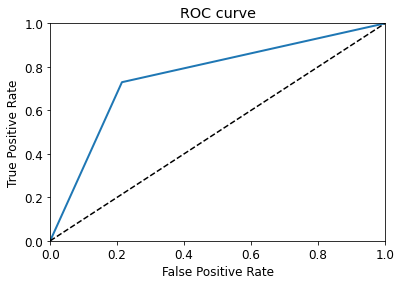

In [480]:
from sklearn.linear_model import LogisticRegression

oversample = ADASYN()
X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = LogisticRegression()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)
# plotting the AUC for all my classes
get_model_ROC_AUC_curve(preds, test_labels)

**DT**

<Figure size 432x288 with 0 Axes>

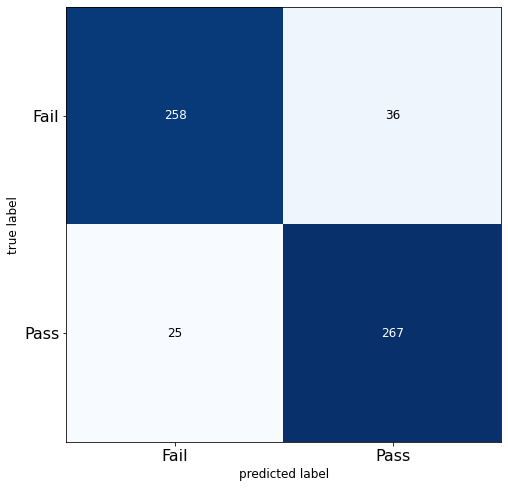

Accuracy of the model is 0.8959
Recall of the model is 0.9144
Precision of the model is 0.8812
specificity of the model is 0.8776
F1_score of the model is 0.8975
AUC Score :  0.8959672910259994


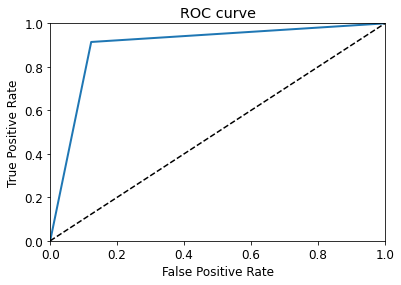

In [499]:
from sklearn.tree import DecisionTreeClassifier as DT
oversample = ADASYN()
X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = DT()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)
# plotting the AUC for all my classes
get_model_ROC_AUC_curve(preds, test_labels)

**NB**

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 432x288 with 0 Axes>

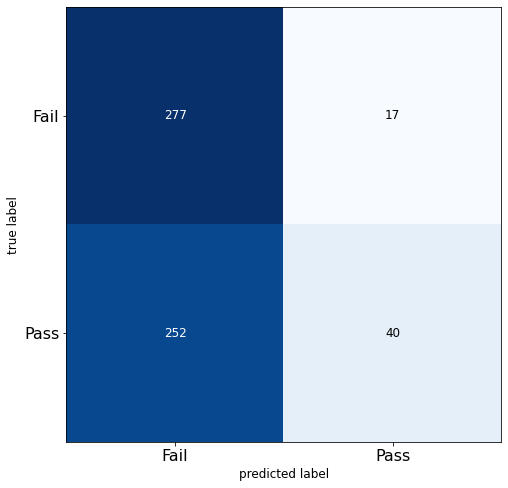

Accuracy of the model is 0.5410
Recall of the model is 0.1370
Precision of the model is 0.7018
specificity of the model is 0.9422
F1_score of the model is 0.2292
AUC Score :  0.5395815860590812


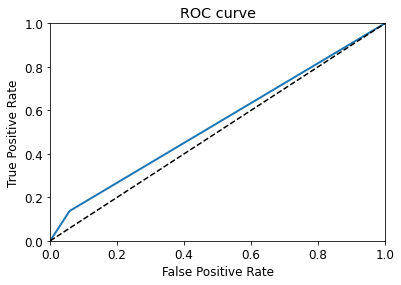

In [524]:
from sklearn.naive_bayes import GaussianNB as NB
oversample = ADASYN()
X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = NB()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)
# plotting the AUC for all my classes
get_model_ROC_AUC_curve(preds, test_labels)

**LDA**

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 432x288 with 0 Axes>

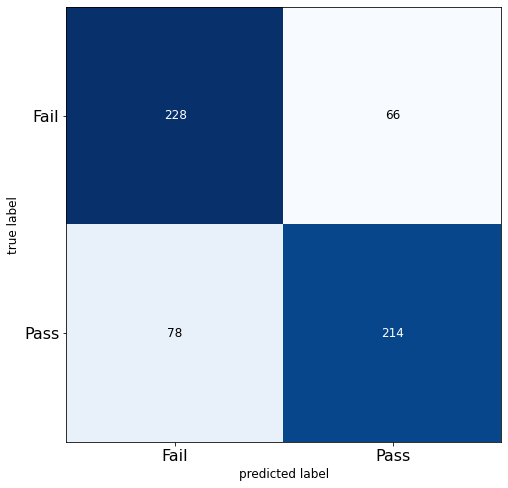

Accuracy of the model is 0.7543
Recall of the model is 0.7329
Precision of the model is 0.7643
specificity of the model is 0.7755
F1_score of the model is 0.7483
AUC Score :  0.7541934582051999


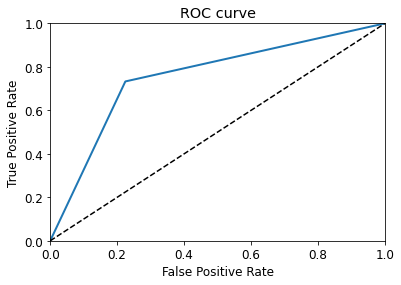

In [526]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
X, y = oversample.fit_sample(features, features_labels)
oversample = ADASYN()
X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = LDA()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)

# plotting the AUC for all my classes
get_model_ROC_AUC_curve(preds, test_labels)

**RF**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


<Figure size 432x288 with 0 Axes>

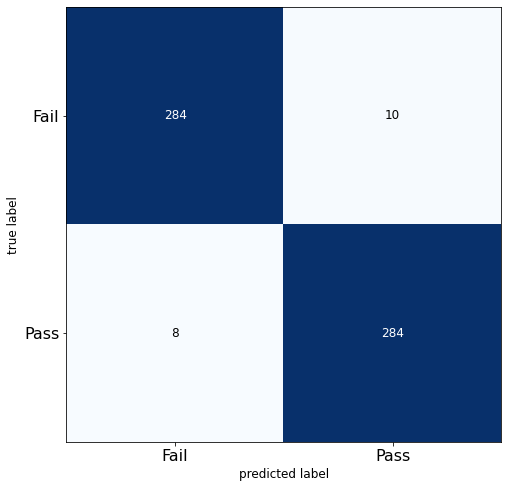

Accuracy of the model is 0.9693
Recall of the model is 0.9726
Precision of the model is 0.9660
specificity of the model is 0.9660
F1_score of the model is 0.9693
AUC Score :  0.9692945671419252


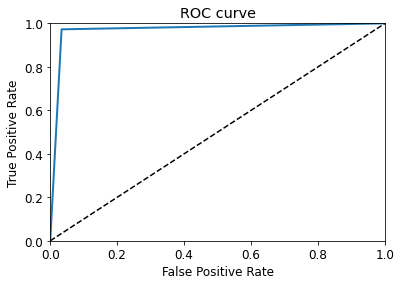

In [512]:
from sklearn.ensemble import RandomForestClassifier as RF


X, y = oversample.fit_sample(features, features_labels)
oversample = ADASYN()
X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = RF()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)

# plotting the AUC for all my classes
get_model_ROC_AUC_curve(preds, test_labels)

**SVC**

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 432x288 with 0 Axes>

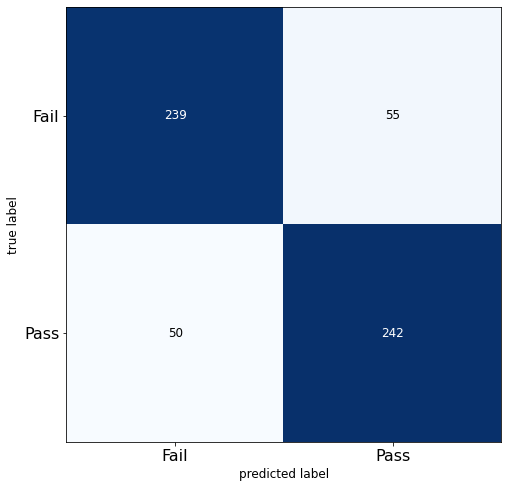

Accuracy of the model is 0.8208
Recall of the model is 0.8288
Precision of the model is 0.8148
specificity of the model is 0.8129
F1_score of the model is 0.8217
AUC Score :  0.8208461466778493


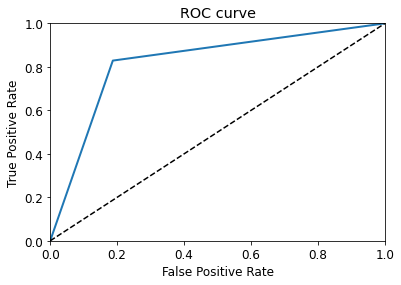

In [515]:
from sklearn.svm import SVC
oversample = ADASYN()
X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = SVC()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)

# plotting the AUC for all my classes
get_model_ROC_AUC_curve(preds, test_labels)

**AdaBoost**

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 432x288 with 0 Axes>

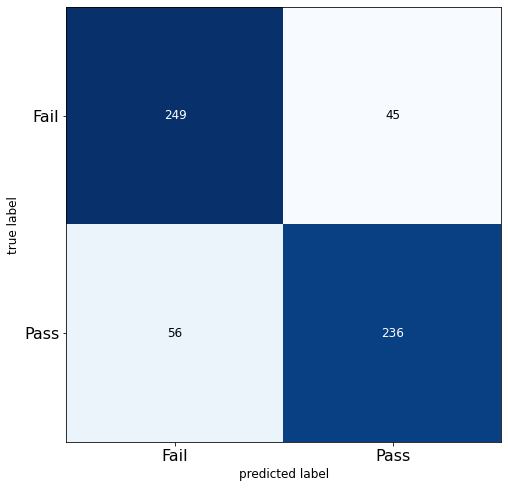

Accuracy of the model is 0.8276
Recall of the model is 0.8082
Precision of the model is 0.8399
specificity of the model is 0.8469
F1_score of the model is 0.8237
AUC Score :  0.827578976796198


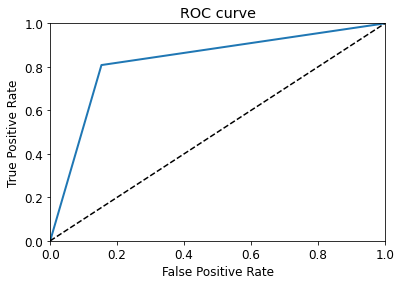

In [520]:
from sklearn.ensemble import AdaBoostClassifier as ADB
oversample = ADASYN()
X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = ADB()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)

# plotting the AUC for all my classes
get_model_ROC_AUC_curve(preds, test_labels)

**GTB**

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 432x288 with 0 Axes>

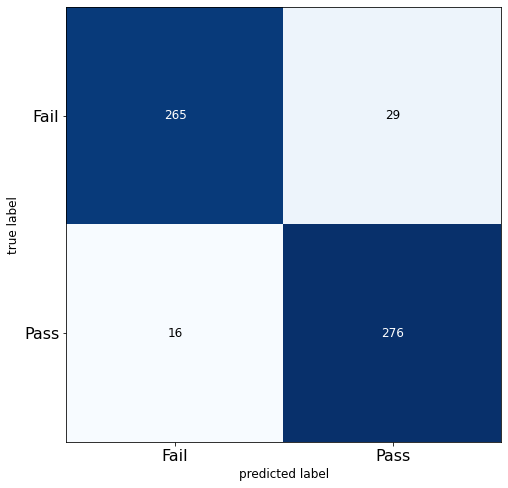

Accuracy of the model is 0.9232
Recall of the model is 0.9452
Precision of the model is 0.9049
specificity of the model is 0.9014
F1_score of the model is 0.9246
AUC Score :  0.9232830118348709


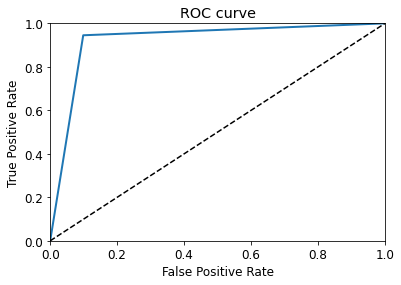

In [523]:
from sklearn.ensemble import GradientBoostingClassifier as GTB
oversample = ADASYN()
X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = GTB()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)

# plotting the AUC for all my classes
get_model_ROC_AUC_curve(preds, test_labels)